# **DropSeq HCC1806 Cell Line: ```train``` data**

-----


In this file, we will perform an exploratory data analysis and the unsupervised and supervised learning on the ```train``` dataset for the HCC1806 cell line with the DropSeq technique.

# **Introduction**

The data that we are going to analyse is gene expression data. This data refers to a cell line of HCC1806 that has been sequenced using Drop Seq. DropSeq is a sequencing technology that is based on the use of microfluidics for quickly profiling thousands of individual cells simultaneously. This is done by encapsulating them in tiny droplets, that can be used for parallel analysis.



# **Python Libraries**

We write down here the main packages that we'll be using along the project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import kurtosis, skew
import plotly.express as px
import matplotlib.colors as colors
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

# plt.style.use(["seaborn"])
np.random.seed(42)

assert pd.__version__ <= "1.5.3" # some cells will NOT run in the new 2.0 version!

Let's import the paths of the datasets. We inform the reader that the datasets are not public and we will not release them.

In [ ]:
path_h_filtered_norm_train = "./HCC1806_Filtered_Normalised_3000_Data_train.txt"
path_h_filtered_norm_test = "./HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt"

# **Exploratory Data Analysis**

In this section we are going to analyse the data. Notice that we are given already filtered and normalized data, so we will not need to transform them further.

## Introductory information

In [ ]:
#import the file
h_train = pd.read_csv(path_h_filtered_norm_train, sep = " ")
h_train.head() 

AAAAAACCCGGC_Normoxia  AAAACCGGATGC_Normoxia  AAAACGAGCTAG_Normoxia  \
H1-5                         2                      2                      5   
MALAT1                       3                      3                      2   
MT-RNR2                      0                      0                      0   
ARVCF                        0                      0                      0   
BCYRN1                       0                      1                      1   

         AAAACTTCCCCG_Normoxia  AAAAGCCTACCC_Normoxia  AAACACAAATCT_Normoxia  \
H1-5                         1                      0                      0   
MALAT1                       3                     12                      3   
MT-RNR2                      0                      0                      0   
ARVCF                        0                      0                      0   
BCYRN1                       0                      0                      1   

         AAACCAAGCCCA_Normoxia  AAACCATGCACT_Normoxia  AAACCTCCGGCT_Normoxia  \
H1-5                         0                      0                      1   
MALAT1                       1                      2                      0   
MT-RNR2                      0                      0                      0   
ARVCF                        0                      0                      0   
BCYRN1                       1                      2                      0   

         AAACGCCGGTCC_Normoxia  ...  TTTTCTGATGGT_Hypoxia  \
H1-5                         0  ...                     0   
MALAT1                       0  ...                     3   
MT-RNR2                      1  ...                     1   
ARVCF                        0  ...                     0   
BCYRN1                       3  ...                     1   

         TTTTGATTCAGA_Hypoxia  TTTTGCAACTGA_Hypoxia  TTTTGCCGGGCC_Hypoxia  \
H1-5                        1                     0                     2   
MALAT1                      1                     1                     1   
MT-RNR2                     2                     2                     2   
ARVCF                       0                     0                     0   
BCYRN1                      1                     0                     1   

         TTTTGTTAGCCT_Hypoxia  TTTTTACCAATC_Hypoxia  TTTTTCCGTGCA_Hypoxia  \
H1-5                        1                     0                     0   
MALAT1                      4                     0                     4   
MT-RNR2                     0                     0                     1   
ARVCF                       0                     0                     0   
BCYRN1                      1                     0                     0   

         TTTTTGCCTGGG_Hypoxia  TTTTTGTAACAG_Hypoxia  TTTTTTTGAATC_Hypoxia  
H1-5                        0                     3                     1  
MALAT1                      1                     3                     6  
MT-RNR2                     0                     1                     0  
ARVCF                       0                     0                     0  
BCYRN1                      1                     0                     0  

[5 rows x 14682 columns]

In [ ]:
#general info about the dataframe
h_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, H1-5 to ZNF682
Columns: 14682 entries, AAAAAACCCGGC_Normoxia to TTTTTTTGAATC_Hypoxia
dtypes: int64(14682)
memory usage: 336.1+ MB


In [ ]:
#Dimensions of the dataframe
h_train.shape

(3000, 14682)

In [ ]:
#which are the indexes, which are the columns
print("Dataframe indexes: ", h_train.index)
print("Dataframe columns: ", h_train.columns)

Dataframe indexes:  Index(['H1-5', 'MALAT1', 'MT-RNR2', 'ARVCF', 'BCYRN1', 'ATXN7L2', 'IGFBP3',
       'H1-3', 'CTIF', 'RNF123',
       ...
       'BATF3', 'CDKN3', 'DLD', 'PMPCA', 'ZNF165', 'SCCPDH', 'NTAN1', 'CLIP2',
       'DUSP23', 'ZNF682'],
      dtype='object', length=3000)
Dataframe columns:  Index(['AAAAAACCCGGC_Normoxia', 'AAAACCGGATGC_Normoxia',
       'AAAACGAGCTAG_Normoxia', 'AAAACTTCCCCG_Normoxia',
       'AAAAGCCTACCC_Normoxia', 'AAACACAAATCT_Normoxia',
       'AAACCAAGCCCA_Normoxia', 'AAACCATGCACT_Normoxia',
       'AAACCTCCGGCT_Normoxia', 'AAACGCCGGTCC_Normoxia',
       ...
       'TTTTCTGATGGT_Hypoxia', 'TTTTGATTCAGA_Hypoxia', 'TTTTGCAACTGA_Hypoxia',
       'TTTTGCCGGGCC_Hypoxia', 'TTTTGTTAGCCT_Hypoxia', 'TTTTTACCAATC_Hypoxia',
       'TTTTTCCGTGCA_Hypoxia', 'TTTTTGCCTGGG_Hypoxia', 'TTTTTGTAACAG_Hypoxia',
       'TTTTTTTGAATC_Hypoxia'],
      dtype='object', length=14682)


In [ ]:
#check the type of the columns
h_train.dtypes.unique() 

array([dtype('int64')], dtype=object)

We notice that in this case we have 14682 cells and 3000 genes. With respect to the data coming from SmartSeq, we see that we have a lot more cells. This is due to DropSeq. In particular, DropSeq in a technique that is used for analysing a large number of cells, since it is more cost-efficient. So DropSeq is able to analyse mRNA transcripts from thousands of individual cells simultaneously while remembering transcripts' cell of origin.

However, if we take the number of detected genes per cell as a measure of sensitivity, DropSeq has a low sensitivity in comparison to other sequencing methods, such as SmartSeq.[$^{[1]}$](https://www.sciencedirect.com/science/article/pii/S1097276517300497)

Notice that here we are still dealing with a gene expression matrix, with cells in the columns and genes in the indexes.
As before, genes are identified by their name. Instead, cells are identified by a short DNA barcode (e.g., TTTTACAGGATC) that is specific to each cell, and with a label (i.e., Hypoxia or Normoxia) that indicates the experimental condition of the cell. The barcode is just a tag that is used to identify reads that originate from the same cell; so this allows to track the single cell in the experiment. 

## Sparsity

At this stage, it is important to get an idea of the sparsity of the data. We can expect that indeed we have sparse data, since they have nbeen sequenced using DropSeq. Recall that DropSeq is a technique that involves encapsulating individual cells in nanoliter-sized droplets and then sequencing the RNA from each droplet separately.
Since each droplet contains only a single cell, the resulting sequencing data is inherently sparse. This means that the sequencing reads for each gene are only observed in a subset of the cells.

Yet, let's start first with some basic information.

In [ ]:
#number of missing values
h_train.isna().sum().sum()

0

We can see that the dataset has no missing values. Now we do an initial inspection of the distribution of the data.

In [ ]:
#general statistics of the dataframe
h_train.describe()

AAAAAACCCGGC_Normoxia  AAAACCGGATGC_Normoxia  AAAACGAGCTAG_Normoxia  \
count             3000.00000            3000.000000            3000.000000   
mean                 0.02900               0.041667               0.024333   
std                  0.23276               0.309778               0.231860   
min                  0.00000               0.000000               0.000000   
25%                  0.00000               0.000000               0.000000   
50%                  0.00000               0.000000               0.000000   
75%                  0.00000               0.000000               0.000000   
max                  5.00000               9.000000               7.000000   

       AAAACTTCCCCG_Normoxia  AAAAGCCTACCC_Normoxia  AAACACAAATCT_Normoxia  \
count            3000.000000            3000.000000            3000.000000   
mean                0.021667               0.029667               0.020000   
std                 0.189409               0.323761               0.170126   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.000000               0.000000               0.000000   
max                 4.000000              12.000000               3.000000   

       AAACCAAGCCCA_Normoxia  AAACCATGCACT_Normoxia  AAACCTCCGGCT_Normoxia  \
count            3000.000000             3000.00000            3000.000000   
mean                0.036000                0.02600               0.034000   
std                 0.250449                0.23525               0.231362   
min                 0.000000                0.00000               0.000000   
25%                 0.000000                0.00000               0.000000   
50%                 0.000000                0.00000               0.000000   
75%                 0.000000                0.00000               0.000000   
max                 4.000000                6.00000               4.000000   

       AAACGCCGGTCC_Normoxia  ...  TTTTCTGATGGT_Hypoxia  TTTTGATTCAGA_Hypoxia  \
count            3000.000000  ...           3000.000000           3000.000000   
mean                0.029333  ...              0.043000              0.049667   
std                 0.218683  ...              0.271739              0.319219   
min                 0.000000  ...              0.000000              0.000000   
25%                 0.000000  ...              0.000000              0.000000   
50%                 0.000000  ...              0.000000              0.000000   
75%                 0.000000  ...              0.000000              0.000000   
max                 4.000000  ...              4.000000              7.000000   

       TTTTGCAACTGA_Hypoxia  TTTTGCCGGGCC_Hypoxia  TTTTGTTAGCCT_Hypoxia  \
count           3000.000000           3000.000000           3000.000000   
mean               0.037000              0.047667              0.057000   
std                0.279864              0.259648              0.304053   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                7.000000              4.000000              5.000000   

       TTTTTACCAATC_Hypoxia  TTTTTCCGTGCA_Hypoxia  TTTTTGCCTGGG_Hypoxia  \
count           3000.000000           3000.000000           3000.000000   
mean               0.023333              0.041667              0.041667   
std                0.214797              0.236536              0.285116   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0

In [ ]:
#general statistics of the dataframe transposed (so for each gene)
h_train.transpose().describe()

H1-5        MALAT1       MT-RNR2         ARVCF        BCYRN1  \
count  14682.000000  14682.000000  14682.000000  14682.000000  14682.000000   
mean       0.709372      1.899333      0.861327      0.001294      1.038142   
std        1.680187      2.790889      1.470822      0.047393      1.634813   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        1.000000      3.000000      1.000000      0.000000      2.000000   
max       58.000000    110.000000     23.000000      4.000000     33.000000   

            ATXN7L2        IGFBP3          H1-3          CTIF        RNF123  \
count  14682.000000  14682.000000  14682.000000  14682.000000  14682.000000   
mean       0.001498      0.371067      0.675862      0.000613      0.000613   
std        0.052176      0.905313      1.292052      0.027366      0.027366   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      0.000000      0.000000   
max        3.000000     14.000000     22.000000      2.000000      2.000000   

       ...         BATF3         CDKN3           DLD         PMPCA  \
count  ...  14682.000000  14682.000000  14682.000000  14682.000000   
mean   ...      0.000477      0.045498      0.026563      0.010693   
std    ...      0.024755      0.239997      0.189220      0.121667   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      2.000000      4.000000      4.000000      5.000000   

             ZNF165        SCCPDH         NTAN1         CLIP2        DUSP23  \
count  14682.000000  14682.000000  14682.000000  14682.000000  14682.000000   
mean       0.004155      0.009672      0.006471      0.002997      0.019003   
std        0.073238      0.114546      0.090554      0.064917      0.156962   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        3.000000      3.000000      3.000000      4.000000      5.000000   

             ZNF682  
count  14682.000000  
mean       0.000477  
std        0.024755  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        2.000000  

[8 rows x 3000 columns]

In [ ]:
#average number of genes expressed, average number of cell expressing
h_train_entries1 = h_train.copy().astype(bool).astype(int)
print("Average expressed genes by each cell: ", np.count_nonzero(h_train_entries1, axis=0).mean().round(3))
print("Average expressing cells for each gene: ", np.count_nonzero(h_train_entries1, axis=1).mean().round(3))

Average expressed genes by each cell:  70.873
Average expressing cells for each gene:  346.853


In [ ]:
#computing this sparsity index
sparsity_index_unfiltered = 1 - (np.count_nonzero(h_train.values) / h_train.size)
sparsity_index_unfiltered

0.9763756073196204

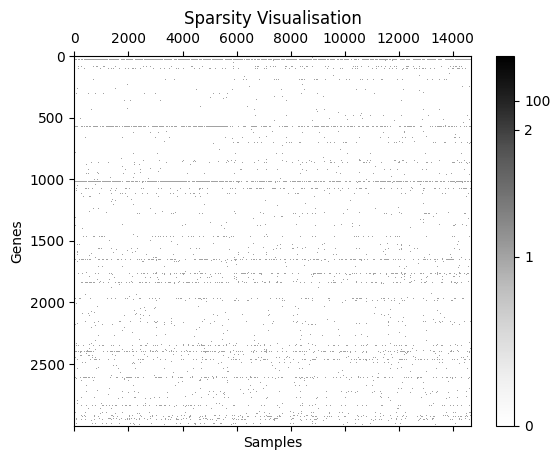

In [ ]:
#sparsity visualisation
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        # Note also that we must extrapolate beyond vmin/vmax
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.8, 1.]
        return np.ma.masked_array(np.interp(value, x, y,
                                            left=-np.inf, right=np.inf))

    def inverse(self, value):
        y, x = [self.vmin, self.vcenter, self.vmax], [0, 0.8, 1]
        return np.interp(value, x, y, left=-np.inf, right=np.inf)


fig, ax = plt.subplots()
midnorm = MidpointNormalize(vmin=0, vcenter=1.75, vmax=250)

graph_temporary = plt.spy(h_train, aspect = "auto", norm=midnorm,
                   cmap='Greys') #hsv
plt.colorbar(graph_temporary).set_ticks([0, 1, 2, 100])
plt.grid(False)
plt.xlabel("Samples")
plt.ylabel("Genes")
ax.set_title('Sparsity Visualisation')

plt.show()

From the visualization and from the sparsity index, we see that the data is definetely sparse. In fact, it is much sparser than the data obtained using SmartSeq.

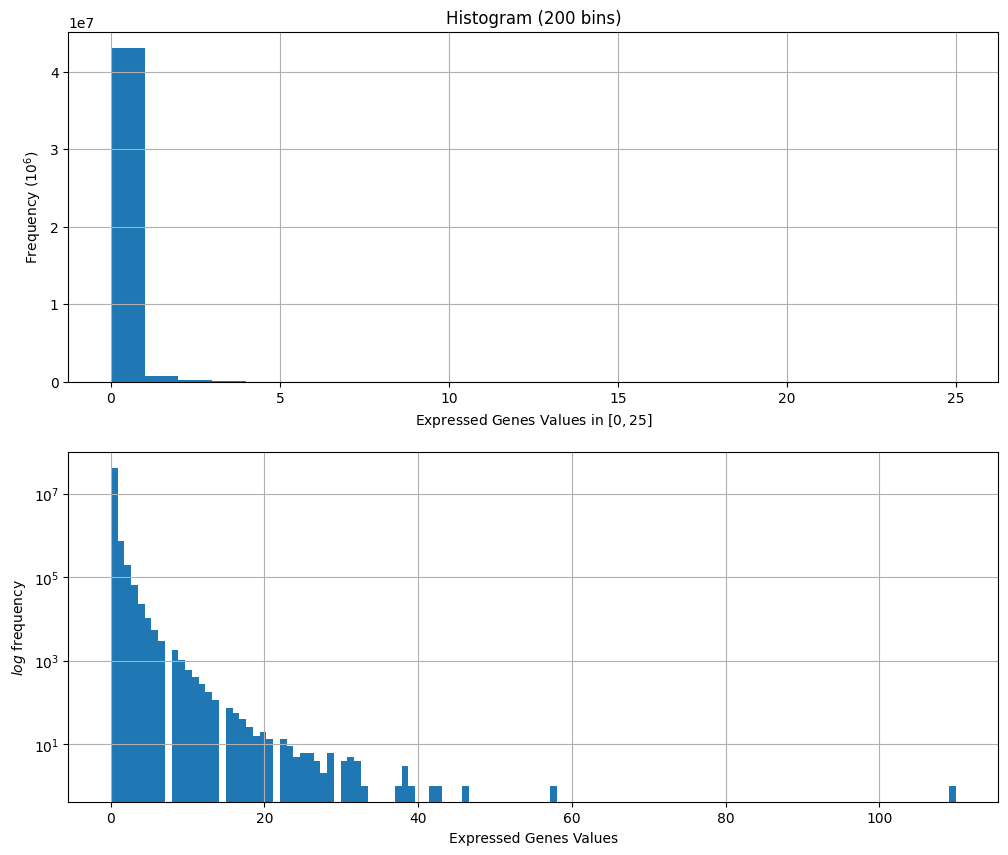

In [ ]:
#distribution of the whole matrix
h_train_flattened = pd.Series(h_train.values.flatten())
fig, ax = plt.subplots(2, 1, figsize=(12, 10)) 
ax[0].hist(h_train_flattened, range = [0, 25], bins = 25)
ax[0].set_xlabel("Expressed Genes Values in $[0, 25]$")
ax[0].set_ylabel("Frequency ($10^6$)")
ax[0].set_title("Histogram (200 bins)")
ax[0].grid(True)
h_train_flattened = h_train_flattened
ax[1].hist(h_train_flattened, bins = 125, log = True)
ax[1].set_xlabel("Expressed Genes Values")
ax[1].set_ylabel("$log$ frequency")
ax[1].grid(True)
plt.show()

In [ ]:
round(h_train_flattened.describe())

count    44046000.0
mean            0.0
std             0.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max           110.0
dtype: float64

In [ ]:
#skewness and kurtosis of the whole matrix
skew_matrix = skew(h_train_flattened)
kurtosis_matrix = kurtosis(h_train_flattened)
print("Skewness of the whole matrix: ", round(skew_matrix))
print("Kurtosis of the whole matrix: ", round(kurtosis_matrix))

Skewness of the whole matrix:  17
Kurtosis of the whole matrix:  1070


Notice that the data is decreasing faster than exponentially, so it means that the distribution has a very heavy tail, as the high kurtosis suggests us. Also, the skewness confirms that the distribution is not symmetric.

Notice that here the skewness and the kurtosis are lower than in the MCF7 case.

Now let's see some interesting informations.

In [ ]:
# which is the gene that is expressed less
min_expressed_gene = h_train.sum(axis = 1).idxmin()
print("Least expressed gene: {}\nNumber of codifying samples: {}".format(min_expressed_gene, h_train.sum(axis = 1)[min_expressed_gene]))

# which is the gene that is expressed most
max_expressed_gene = h_train.sum(axis = 1).idxmax()
print("\nMost expressed gene: {}\nNumber of codifying samples: {}".format(max_expressed_gene, h_train.sum(axis = 1)[max_expressed_gene]))

#which is the cell that expresses less (cell: how many it produces, which uniques)
min_expressed_gene = h_train.sum(axis = 0).idxmin()
print("\nLeast expressed cell: {}\nProduced genes:{}\nUnique genes:{}\n".format(min_expressed_gene, h_train.sum(axis = 0)[min_expressed_gene], h_train.astype(bool).sum(axis = 0).min()))

#which is the cell that expresses most (cell: how many it produces, which uniques)
max_expressed_gene = h_train.sum(axis = 0).idxmax()
print("Most expressed cell: {}\nProduced genes:{}\nUnique genes:{}".format(max_expressed_gene, h_train.sum(axis = 0)[max_expressed_gene], h_train.astype(bool).sum(axis = 0).max()))

Least expressed gene: THSD7A
Number of codifying samples: 1

Most expressed gene: H4C3
Number of codifying samples: 49418

Least expressed cell: TTAGGGGTGCAT_Normoxia
Produced genes:39
Unique genes:18

Most expressed cell: GTCCCTGGGACC_Normoxia
Produced genes:220
Unique genes:166


In [ ]:
#which gene are produced the most by each cell
print(pd.DataFrame({'gene': h_train.idxmax(), 'value': h_train.max()}))
print("Uniques[{}]: {}".format(h_train.idxmax().unique().size, h_train.idxmax().unique()))

                          gene  value
AAAAAACCCGGC_Normoxia  HSP90B1      5
AAAACCGGATGC_Normoxia     H4C3      9
AAAACGAGCTAG_Normoxia     H4C3      7
AAAACTTCCCCG_Normoxia   HNRNPU      4
AAAAGCCTACCC_Normoxia   MALAT1     12
...                        ...    ...
TTTTTACCAATC_Hypoxia       FTL      4
TTTTTCCGTGCA_Hypoxia    MALAT1      4
TTTTTGCCTGGG_Hypoxia       FTL      5
TTTTTGTAACAG_Hypoxia      H4C3      5
TTTTTTTGAATC_Hypoxia    MALAT1      6

[14682 rows x 2 columns]
Uniques[439]: ['HSP90B1' 'H4C3' 'HNRNPU' 'MALAT1' 'RPS5' 'HSPA5' 'FTL' 'ENO1' 'H1-5'
 'BCYRN1' 'HSP90AA1' 'H2AC12' 'CALM2' 'H1-3' 'NCOR2' 'IGFBP3' 'NCL'
 'YWHAZ' 'HSPD1' 'MSANTD3' 'HSP90AB1' 'PLEC' 'SERF2' 'MT-RNR2' 'FAM120A'
 'HNRNPA2B1' 'CALR' 'MYH9' 'GAPDH' 'AKR1C2' 'EZR' 'RPL41' 'AKR1C1'
 'NDUFB2' 'H1-2' 'APBA2' 'TOP2A' 'TMSB4X' 'RPL8' 'RPS28' 'RPL36' 'CRACDL'
 'KRT14' 'RPS12' 'GPR153' 'POLR2L' 'H2BC4' 'H3C2' 'RPS8' 'ARHGDIA' 'RPS15'
 'H2AC11' 'CLIP1' 'STT3A' 'MKI67' 'RAB8B' 'GSTP1' 'BRD4' 'SECISBP2L'
 'ZNF28

Let's now analyse normoxic and hypoxic cells

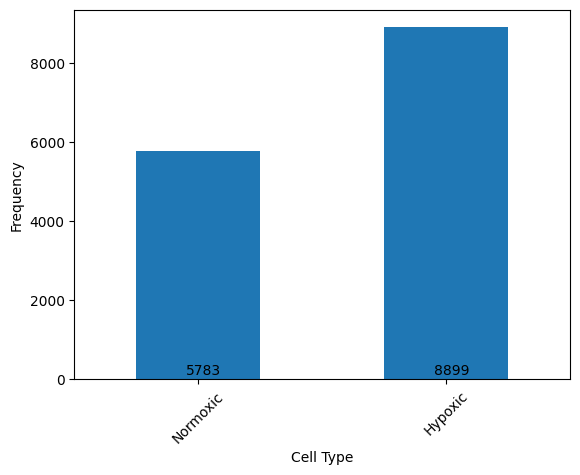

In [ ]:
normoxic_cells = h_train.columns.str.contains('Normoxia').sum()
hypoxic_cells = h_train.columns.str.contains('Hypoxia').sum()
s = pd.Series({"Normoxic" : normoxic_cells, "Hypoxic" : hypoxic_cells})
s.plot.bar(rot = 45)
plt.text(-0.05, 118, str(normoxic_cells))
plt.text(0.95, 127, str(hypoxic_cells))
plt.xlabel("Cell Type")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

Notice that the number of Hypoxic cells in this case is much larger than the number of Normoxic ones.

In [ ]:
#define dataframe with normoxic, hypoxic cells
normoxic_cells = h_train.columns.str.contains('Normoxia')
hypoxic_cells = h_train.columns.str.contains('Hypoxia')
norm_hypo_cells = pd.Series({"Normoxic" : normoxic_cells, "Hypoxic" : hypoxic_cells})

In [ ]:
#values of nonzero for normoxic, hypoxic cells
codified_genes_normoxia = np.count_nonzero(h_train.loc[:, normoxic_cells].values)
codified_genes_hypoxia = np.count_nonzero(h_train.loc[:, hypoxic_cells].values)
print("Codified genes in normoxic cells: ", codified_genes_normoxia)
print("Codified genes in hypoxic cells: ", codified_genes_hypoxia)

Codified genes in normoxic cells:  408610
Codified genes in hypoxic cells:  631950


In [ ]:
#sparsity index for normoxic and hypoxic cells
sparsity_index_hypoxic = 1 - (np.count_nonzero(h_train.loc[:, hypoxic_cells].values) / h_train.loc[:, hypoxic_cells].size)
sparsity_index_normoxic = 1 - (np.count_nonzero(h_train.loc[:, normoxic_cells].values) / h_train.loc[:, normoxic_cells].size)
print("Sparsity index normoxic: ", sparsity_index_normoxic)
print("Sparsity index hypoxic: ", sparsity_index_hypoxic)

Sparsity index normoxic:  0.9764476338693873
Sparsity index hypoxic:  0.9763288009888752


Differently from the sequencing with SmartSeq, notice that here hypoxic cells are more, and more expressed. This is not ideal, since we would like our data to be as balanced as possible. While an idea would be to remove some lowly expressed hypoxic cells, this may lead to removing useful data. 
Since the difference is not that much, we proceed our analysis keeping the data this way.

Now let's check the distribution of normoxic/hypoxic cells.

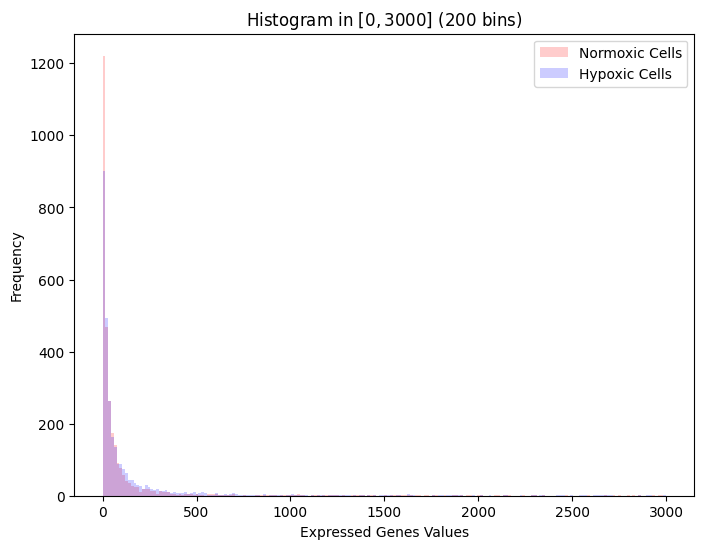

In [ ]:
#check for the distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
ax.hist(h_train.loc[:, normoxic_cells].sum(axis = 1), range = [0, 3000], bins = 200, alpha = 0.2, color = "red", label = "Normoxic Cells")
ax.hist(h_train.loc[:, hypoxic_cells].sum(axis = 1), range = [0, 3000], bins = 200, alpha = 0.2, color = "blue", label = "Hypoxic Cells")
ax.set_xlabel("Expressed Genes Values")
ax.set_ylabel("Frequency")
ax.set_title("Histogram in $[0, 3000]$ (200 bins)")
ax.legend()
plt.show()

We can see that both hypoxic and normoxic cells follow a similar distribution pattern, with most gene expression values being 0. This also tells us that, overall, the cells do not differ in the amount of genes they codify for.

Let's check the most expressed genes in each type.

In [ ]:
#check for normoxic, hypoxic cells which are the top 10 expressed genes
print("Top 10 genes of normoxic cells:\n", h_train.loc[:, normoxic_cells].sum(axis = 1).nlargest(10))
print("Top 10 genes of hypoxic cells:\n", h_train.loc[:, hypoxic_cells].sum(axis = 1).nlargest(10))

Top 10 genes of normoxic cells:
 H4C3        21663
FTL         17678
RPS5        16756
MALAT1      13286
HSP90AA1    12161
HSP90AB1    10792
BCYRN1       9365
NCL          8252
HSP90B1      7773
RPL8         7491
dtype: int64
Top 10 genes of hypoxic cells:
 H4C3        27755
FTL         27351
RPS5        21584
ENO1        15344
MALAT1      14600
HSP90B1     14501
RPS28       14181
RPL41       13033
RPL8        10797
HSP90AA1    10554
dtype: int64


So concluding, we see that our dataframe is very sparse.

In [ ]:
#bytes occupied by nonsparse/sparse representation of dataframe
h_train_sparr = h_train.astype(pd.SparseDtype("int", 0))
print('dense : {:0.2f} bytes'.format(h_train.memory_usage().sum() / 1e3))
print('sparse: {:0.2f} bytes'.format(h_train_sparr.memory_usage().sum() / 1e3))

dense : 352458.09 bytes
sparse: 12576.81 bytes


Since the data is very sparse, we have decided not to analyse the outliers. As in the SmartSeq case, we expect that most of the information is carried through outliers. 

## Distributions

Now let's analyse better the distribution of the whole dataframe.

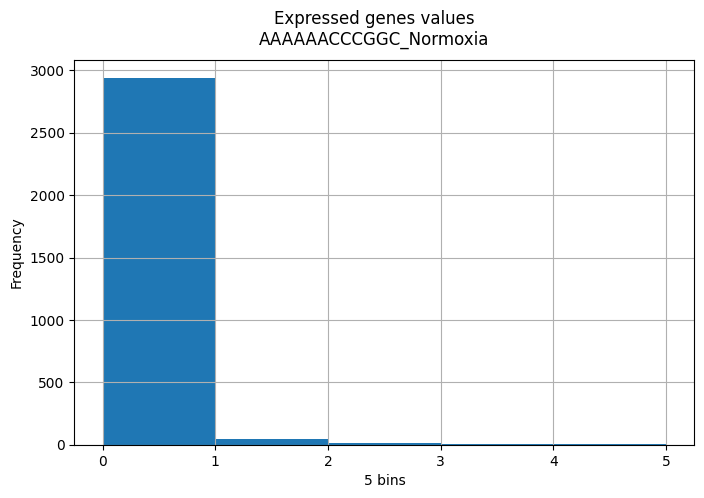

In [ ]:
#histogram of a single column
col = h_train.iloc[:, 0]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
col.hist(bins=5)
plt.suptitle(f"Expressed genes values\n{col.name}")
axs.set_xlabel("5 bins")
axs.set_ylabel("Frequency")
plt.show()

We still see few counts associated with a large proportion of genes, a long right tail and a large dynamic range.
As before, we can say that the distribution is not normal. In particular, we could inspect the skewnewss and kurtosis.

Let's start by analising those of a single column. Recall that kurtosis measures how much of the data in a probability distribution are centered around the middle (mean) vs. the tails. Skewness instead measures the relative symmetry of a distribution around the mean.

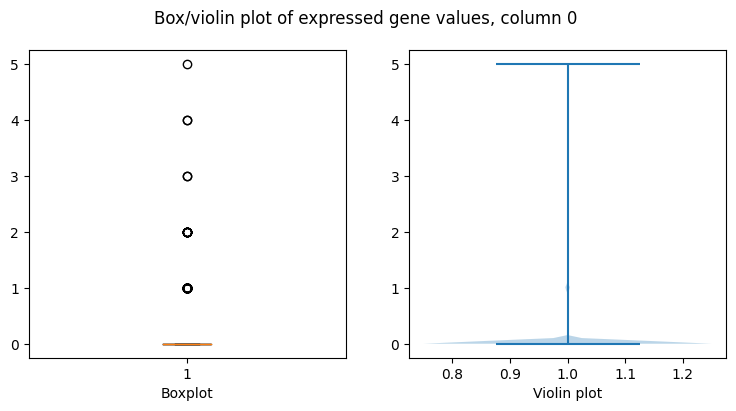

In [ ]:
# boxplot and violin plot of a single column
col = h_train.iloc[:, 0]
fig, ax= plt.subplots(1,2, figsize=(9, 4))
plt.suptitle("Box/violin plot of expressed gene values, column 0")
ax[0].boxplot(col)
ax[1].violinplot(col)
ax[0].set_xlabel("Boxplot")
ax[1].set_xlabel("Violin plot")
plt.show()

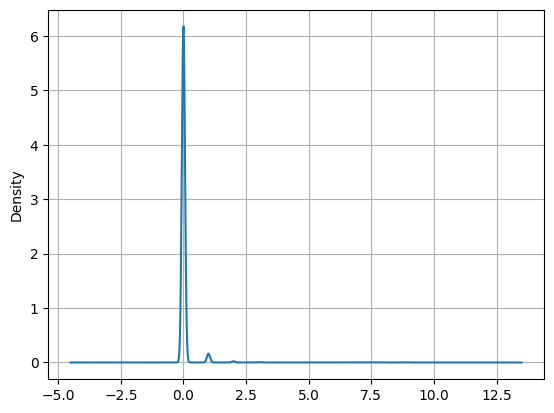

In [ ]:
# density of one column of the data
h_train[h_train.columns[1]].plot.density(legend = False)
plt.grid(True)
plt.show()

We still see few counts associated with a large proportion of genes, a long right tail and a large dynamic range.
As before, we can say that the distribution is not normal. In particular, we could inspect the skewnewss and kurtosis.

Let's start by analising those of a single column. Recall that kurtosis measures how much of the data in a probability distribution are centered around the middle (mean) vs. the tails. Skewness instead measures the relative symmetry of a distribution around the mean.

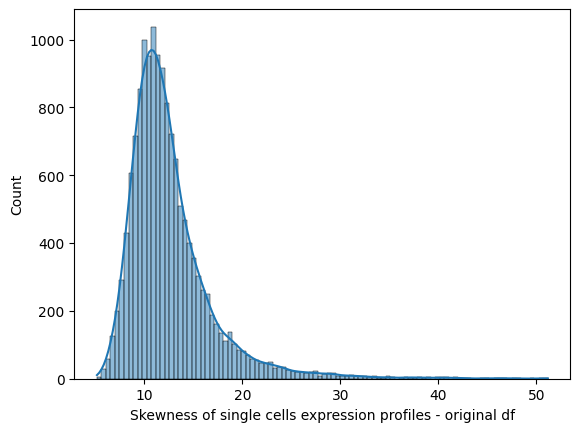

In [ ]:
#skewness of distribution
h_train_colnames = list(h_train.columns)
h_train_colN = np.shape(h_train)[1]
h_train_skew_cells = []
for i in range(h_train_colN):     
     v_df = h_train[h_train_colnames[i]]
     h_train_skew_cells += [skew(v_df)]   
sns.histplot(h_train_skew_cells, bins=100, kde = True)
plt.xlabel('Skewness of single cells expression profiles - original df')
plt.show()


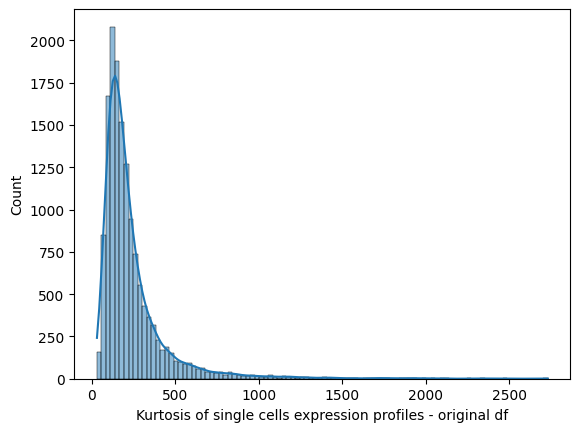

In [ ]:
#kurtosis of distribution
h_train_kurt_cells = []
for i in range(h_train_colN) :     
     v_df = h_train[h_train_colnames[i]]
     h_train_kurt_cells += [kurtosis(v_df)]   
h_train_kurt_cells
ax = sns.histplot(h_train_kurt_cells,bins=100, kde = True)
plt.xlabel('Kurtosis of single cells expression profiles - original df')
plt.show()

In [ ]:
skewness_list = []
kurtosis_list = []

for col in h_train.columns:
  skewness_list.append(skew(h_train[col]))
  kurtosis_list.append(kurtosis(h_train[col]))

skewness_series = pd.Series(skewness_list)
kurtosis_series = pd.Series(kurtosis_list)

In [ ]:
print("Skewness\n", skewness_series.describe())
print("\nKurtosis\n", kurtosis_series.describe())

Skewness
 count    14682.000000
mean        12.640168
std          4.424448
min          5.169028
25%          9.929195
50%         11.655012
75%         14.045413
max         51.186132
dtype: float64

Kurtosis
 count    14682.000000
mean       240.667139
std        220.640646
min         30.526105
25%        124.723506
50%        177.430303
75%        269.998074
max       2730.929623
dtype: float64


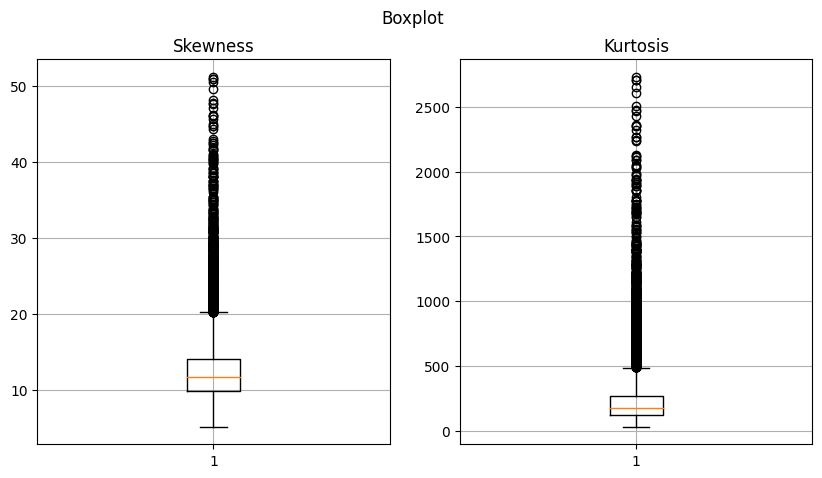

In [ ]:
# boxplot of skewness and kurtosis
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle("Boxplot")
ax[0].boxplot(skewness_series)
ax[0].grid(True)
ax[0].set_title("Skewness")
ax[1].boxplot(kurtosis_series)
ax[1].grid(True)
ax[1].set_title("Kurtosis")
plt.show()

So we see that the distributions are highly non-normal, very skewed with heavy tails. Therefore we can be sure that data is not normal.

Now we would like to check if we can model our data as a Poisson or as a Negative binomial distribution (Gamma, in the continuous case).

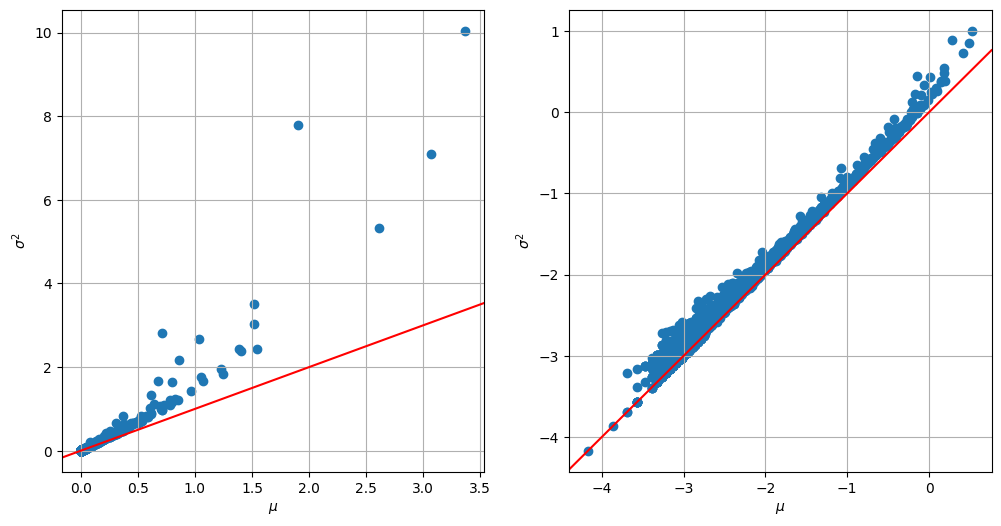

In [ ]:
h_train_var = h_train.var(axis = 1)
h_train_mean = h_train.mean(axis = 1)

fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].scatter(h_train_mean, h_train_var, label = "Data")
ax[0].set_xlabel("$\mu$")
ax[0].set_ylabel("$\sigma^2$")
ax[0].grid(True)
ax[0].axline((0,0), slope=1, color = 'r', label = "Variance = Mean")

ax[1].scatter(h_train_mean.apply(np.log10), h_train_var.apply(np.log10), label = "Data")
ax[1].set_xlabel("$\mu$")
ax[1].set_ylabel("$\sigma^2$")
ax[1].grid(True)
ax[1] = plt.gca() 
ax[1].axline((0,0), slope=1, color = 'r', label = "Variance = Mean")


plt.show()

Differently from the SmartSeq case, the scatter of the data points kind of falls on the diagonal $y=x$. Therefore, the Poisson distribution can be used to represent our data. 

Of course this analysis has been more heuristic than statistically significant, yet it serves for us as a step to further understand the data.



### Correlation

We now want to check correlation between samples and features. First we proceed at looking the correlation between samples.

In order to analyse correlation, 2 main measures are used:
- Pearson correlation coefficient. It is a bivariate correlation coefficient, that measures the linear correlation between two sets of data.
-  Spearman's rank correlation. It is a nonparametric measure of rank correlation. It assesses how well the relationship between two variables can be described using a monotonic function. So it assesses monotonic relationships.



Number of cells included:  (1000, 1000)
Average between minimum and maximum correlation:  0.49427500357611437
Average correlation of expression profiles between genes:  0.3443306654486868


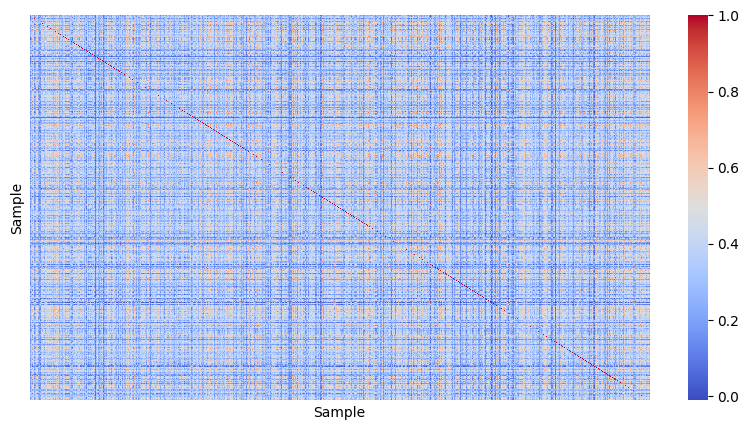

In [ ]:
#pearson correlation coefficient
random.seed(42)
random_columns = [i for i in range(0,h_train.shape[0])]
random.shuffle(random_columns)

corr_matrix_p = h_train.iloc[:, random_columns[:1000]].corr(method = 'pearson') #correlation matrix made of 250 random columns

average = (corr_matrix_p.values.max() - corr_matrix_p.values.min()) /2 + corr_matrix_p.values.min()
print("Number of cells included: ", np.shape(corr_matrix_p))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_p.mean().mean())

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_p, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()

Number of cells included:  (1000, 1000)
Average between minimum and maximum correlation:  0.4915327753288004
Average correlation of expression profiles between genes:  0.26224645143722264


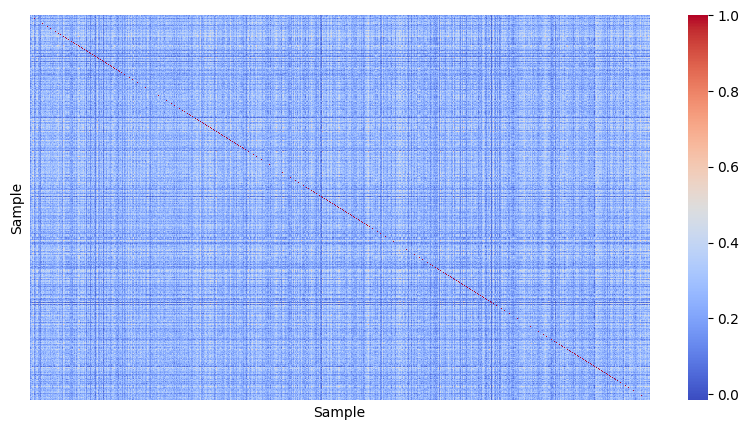

In [ ]:
#spearman correlation coefficient
corr_matrix_s = h_train.iloc[:, random_columns[:1000]].corr(method = 'spearman')

average = (corr_matrix_s.values.max() - corr_matrix_s.values.min()) /2 + corr_matrix_s.values.min()
print("Number of cells included: ", np.shape(corr_matrix_s))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_s.mean().mean())

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_s, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()

We see that most cells are only positively correlated between each other. 
We see that there are some blue line, indicating 0 correlation. From the analysis before, we could think that most of this cells are problematic (e.g. dead). However, since the data is very sparse and since from the previous analysis we have seen that low correlated cells were not very expressed, this also may be due to sparsity.

However, let's analyse it more closely. From now on, we are going to analyse the correlation using the Pearson correlation coefficient. 


First of all, we now can plot the distribution of the correlation between gene expression profiles using an histogram (we do it on the first five variables in order not to lose too much time). 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

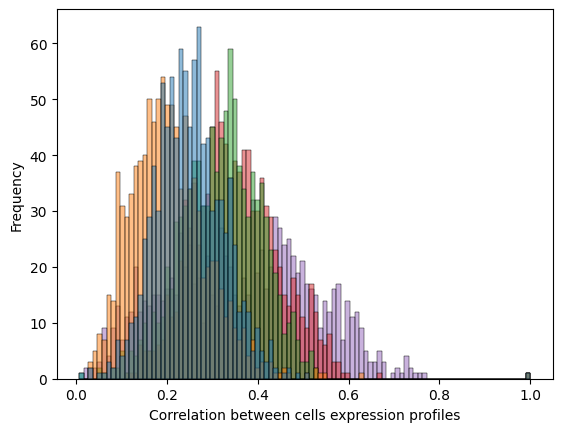

In [ ]:
c = corr_matrix_p

c_small=corr_matrix_p.iloc[:,:5]
sns.histplot(c_small,bins=100)
plt.legend().set_visible(False);
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')
plt.plot()

Differently from before, we see that the correlation between cells is much lower.

Now, we want to focus on the distribution of cells which have low correlation with all the others, in order to understand why this happens, and what are its properties.

First, we want to define cells that are not much correlated with others. We do so by saying that the average correlation with all the other cells is smaller than a threshold, than we define.

In [ ]:
#find low and high correlated cells
correlation_threshold = 0.18

low_corr_cells = (corr_matrix_p.sum(axis = 0) / corr_matrix_p.shape[1] ) <= correlation_threshold
high_corr_cells = ((corr_matrix_p.sum(axis = 0) / corr_matrix_p.shape[1] ) > correlation_threshold) & ((corr_matrix_p.sum(axis = 0) / corr_matrix_p.shape[1] ) <= 0.47)
very_high_corr_cells = (corr_matrix_p.sum(axis = 0) / corr_matrix_p.shape[1] ) > 0.47

Notice that the correlation threshold used is much lower than before. This might mean that we will not find any significant difference between types of cells.

Now, let's analyse the distribution of the cells.

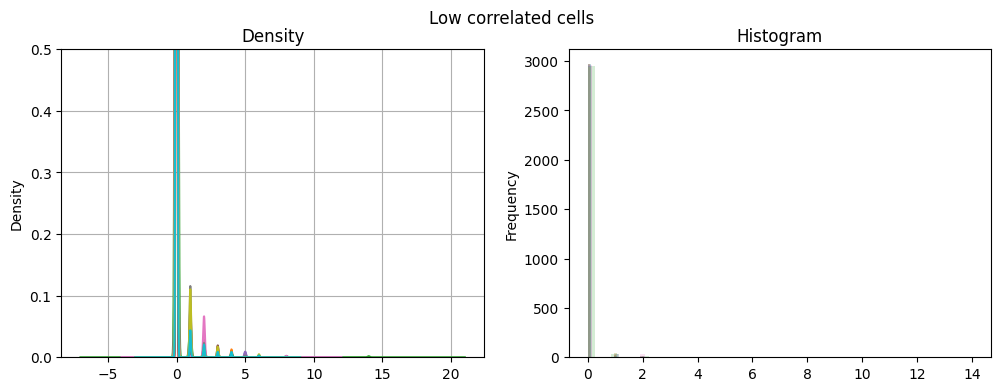

In [ ]:
low_corr = h_train.iloc[:, random_columns[:1000]].loc[:, low_corr_cells]

# 10 densities
fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("Low correlated cells")
for s in low_corr.columns[:10]:
    low_corr[s].plot.density(legend = False, ax = ax[0])  
ax[0].grid(True)
ax[0].set_title("Density")
ax[0].set_ylim(0,0.5)
 
for s in low_corr.columns[:10]:
    ax[1].hist(low_corr[s], bins = 50, alpha = 0.2)
ax[1].set_ylabel("Frequency")
ax[1].set_title("Histogram")
plt.show()

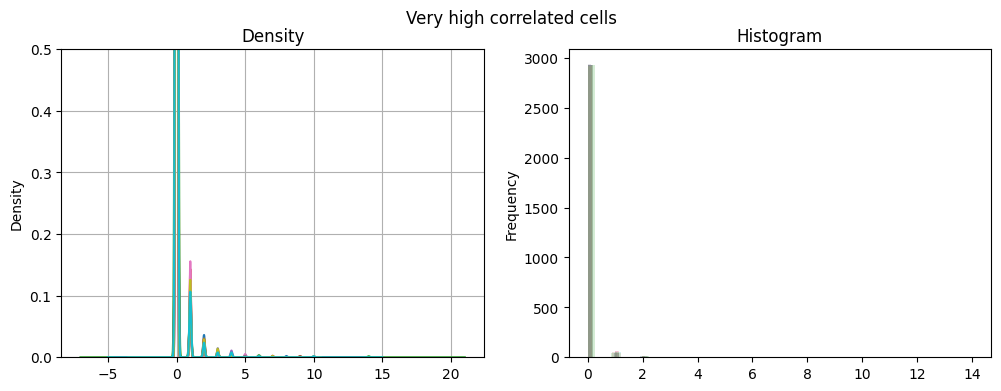

In [ ]:
very_high_corr = h_train.iloc[:, random_columns[:1000]].loc[:, very_high_corr_cells]

# 10 densities
fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("Very high correlated cells")
for s in very_high_corr.columns[:10]:
    very_high_corr[s].plot.density(legend = False, ax = ax[0])  
ax[0].grid(True)
ax[0].set_title("Density")
ax[0].set_ylim(0,0.5)
 
for s in very_high_corr.columns[:10]:
    ax[1].hist(very_high_corr[s], bins = 50, alpha = 0.2)
ax[1].set_ylabel("Frequency")
ax[1].set_title("Histogram")
plt.show()

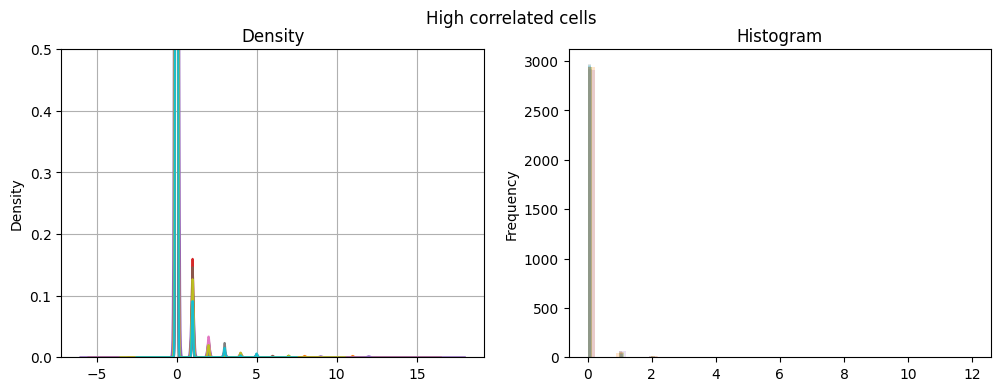

In [ ]:
high_corr =  h_train.iloc[:, random_columns[:1000]].loc[:, high_corr_cells]

# 10 densities
fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("High correlated cells")
for s in high_corr.columns[:10]:
    high_corr[s].plot.density(legend = False, ax = ax[0])  
ax[0].grid(True)
ax[0].set_title("Density")
ax[0].set_ylim(0,0.5)
 
for s in high_corr.columns[:10]:
    ax[1].hist(high_corr[s], bins = 50, alpha = 0.2)
ax[1].set_ylabel("Frequency")
ax[1].set_title("Histogram")
plt.show()

From the distributions, we see that the distribution of all cells are mainly 0, so they are not very much expressed. 
The results cannot be interpreted very well due to this.
However, we can still try to see some statistics to see if there is a difference.

In [ ]:
#average
print("Average expression low correlation: ", low_corr.mean().mean())
print("Average expression high correlation: ", high_corr.mean().mean())
print("Average expression very high correlation: ", very_high_corr.mean().mean())

Average expression low correlation:  0.025055555555555557
Average expression high correlation:  0.03453938768489852
Average expression very high correlation:  0.03676923076923077


In [ ]:
#sparsity of low_corr, high_corr and very_high_corr
sparsity_index_low = 1 - (np.count_nonzero(low_corr.values) / low_corr.size)
sparsity_index_high = 1 - (np.count_nonzero(high_corr.values) / high_corr.size)
sparsity_index_very_high = 1 - (np.count_nonzero(very_high_corr.values) / very_high_corr.size)
print("Low correlation: ", sparsity_index_low)
print("High correlation: ", sparsity_index_high)
print("Very high correlation: ", sparsity_index_very_high)

Low correlation:  0.9852407407407408
High correlation:  0.9765232198142415
Very high correlation:  0.9766153846153847


Notice that all types of cells are very sparse and have a very low expression.

Now, we are interested in how hypoxic and normoxic cells relate with each other. So, we want to analyse, using the Pearson correlation coefficient, the correlation between hypoxic and normoxic cells between them.

Hypoxic:
Number of cells included:  (500, 500)
Average between minimum and maximum correlation:  0.49487420451698905
Average correlation of expression profiles between genes:  0.2938608499888318
Min. correlation of expression profiles between cells:  -0.010251590966021922
Normoxic:
Number of cells included:  (500, 500)
Average between minimum and maximum correlation:  0.49945401849304233
Average correlation of expression profiles between genes:  0.37401179076956703
Min. correlation of expression profiles between cells:  -0.0010919630139153082
Mixed:
Number of cells included:  (250, 250)
Average between minimum and maximum correlation:  0.43572874820508894
Average correlation of expression profiles between genes:  0.30324469459743086
Min. correlation of expression profiles between cells:  0.0051150996050918435


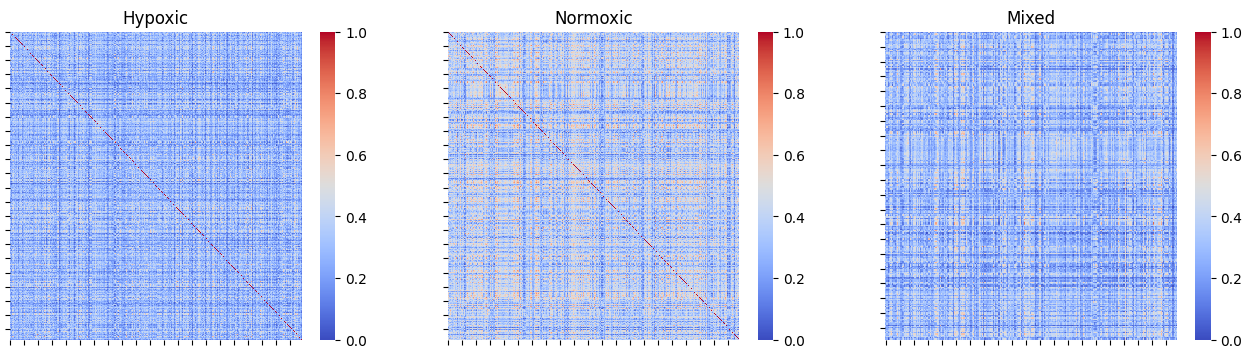

In [ ]:
normoxic_cells = h_train.columns[h_train.columns.str.contains('Normoxia')].tolist()[:500]
hypoxic_cells = h_train.columns[h_train.columns.str.contains('Hypoxia')].tolist()[:500]

#correlation matrix between hypoxic cells
corr_matrix_hypoxic = h_train.loc[:, hypoxic_cells].corr(method = 'pearson')
corr_matrix_hypoxic
print("Hypoxic:")
average = (corr_matrix_hypoxic.values.max() - corr_matrix_hypoxic.values.min()) /2 + corr_matrix_hypoxic.values.min()
print("Number of cells included: ", np.shape(corr_matrix_hypoxic))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_hypoxic.mean().mean())
print("Min. correlation of expression profiles between cells: ", corr_matrix_hypoxic.values.min())

#correlation matrix between normoxic cells
corr_matrix_normoxic = h_train.loc[:, normoxic_cells].corr(method = 'pearson')
corr_matrix_normoxic
print("Normoxic:")
average = (corr_matrix_normoxic.values.max() - corr_matrix_normoxic.values.min()) /2 + corr_matrix_normoxic.values.min()
print("Number of cells included: ", np.shape(corr_matrix_normoxic))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_normoxic.mean().mean())
print("Min. correlation of expression profiles between cells: ", corr_matrix_normoxic.values.min())

#correlation matrix between mixed cells
hy_no_cells = hypoxic_cells[:500].copy()
for i in normoxic_cells[:500]:
  hy_no_cells.append(i)

corr_matrix_mixed = h_train.loc[:, hy_no_cells].corr(method = 'pearson').loc[normoxic_cells[:250], hypoxic_cells[:250]]
corr_matrix_mixed
print("Mixed:")
average = (corr_matrix_mixed.values.max() - corr_matrix_mixed.values.min()) /2 + corr_matrix_mixed.values.min()
print("Number of cells included: ", np.shape(corr_matrix_mixed))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_mixed.mean().mean())
print("Min. correlation of expression profiles between cells: ", corr_matrix_mixed.values.min())

#Statistics:
fig, ax =plt.subplots(1,3, figsize = (16,4))

sns.heatmap(corr_matrix_hypoxic, cmap='coolwarm', ax=ax[0], vmin=0, vmax=1)
ax[0].set(title='Hypoxic', xticklabels=[], yticklabels=[])

sns.heatmap(corr_matrix_normoxic, cmap='coolwarm', ax=ax[1], vmin=0, vmax=1)
ax[1].set(title='Normoxic', xticklabels=[], yticklabels=[])

sns.heatmap(corr_matrix_mixed, cmap='coolwarm', ax=ax[2], vmin=0, vmax=1)
ax[2].set(title='Mixed', xticklabels=[], yticklabels=[])

plt.show()


Notice that normoxic cells seems to be more correlated between them than hypoxic cells.

Now we are interested in the analysis of the correlation of genes. Let's first use again Pearson and Spearman correlation coefficients.

Number of cells included:  (300, 300)
Average between minimum and maximum correlation:  0.377750841277273
Average correlation of expression profiles between genes:  0.0039000735758982145
Min. correlation of expression profiles between genes:  -0.244498317445454


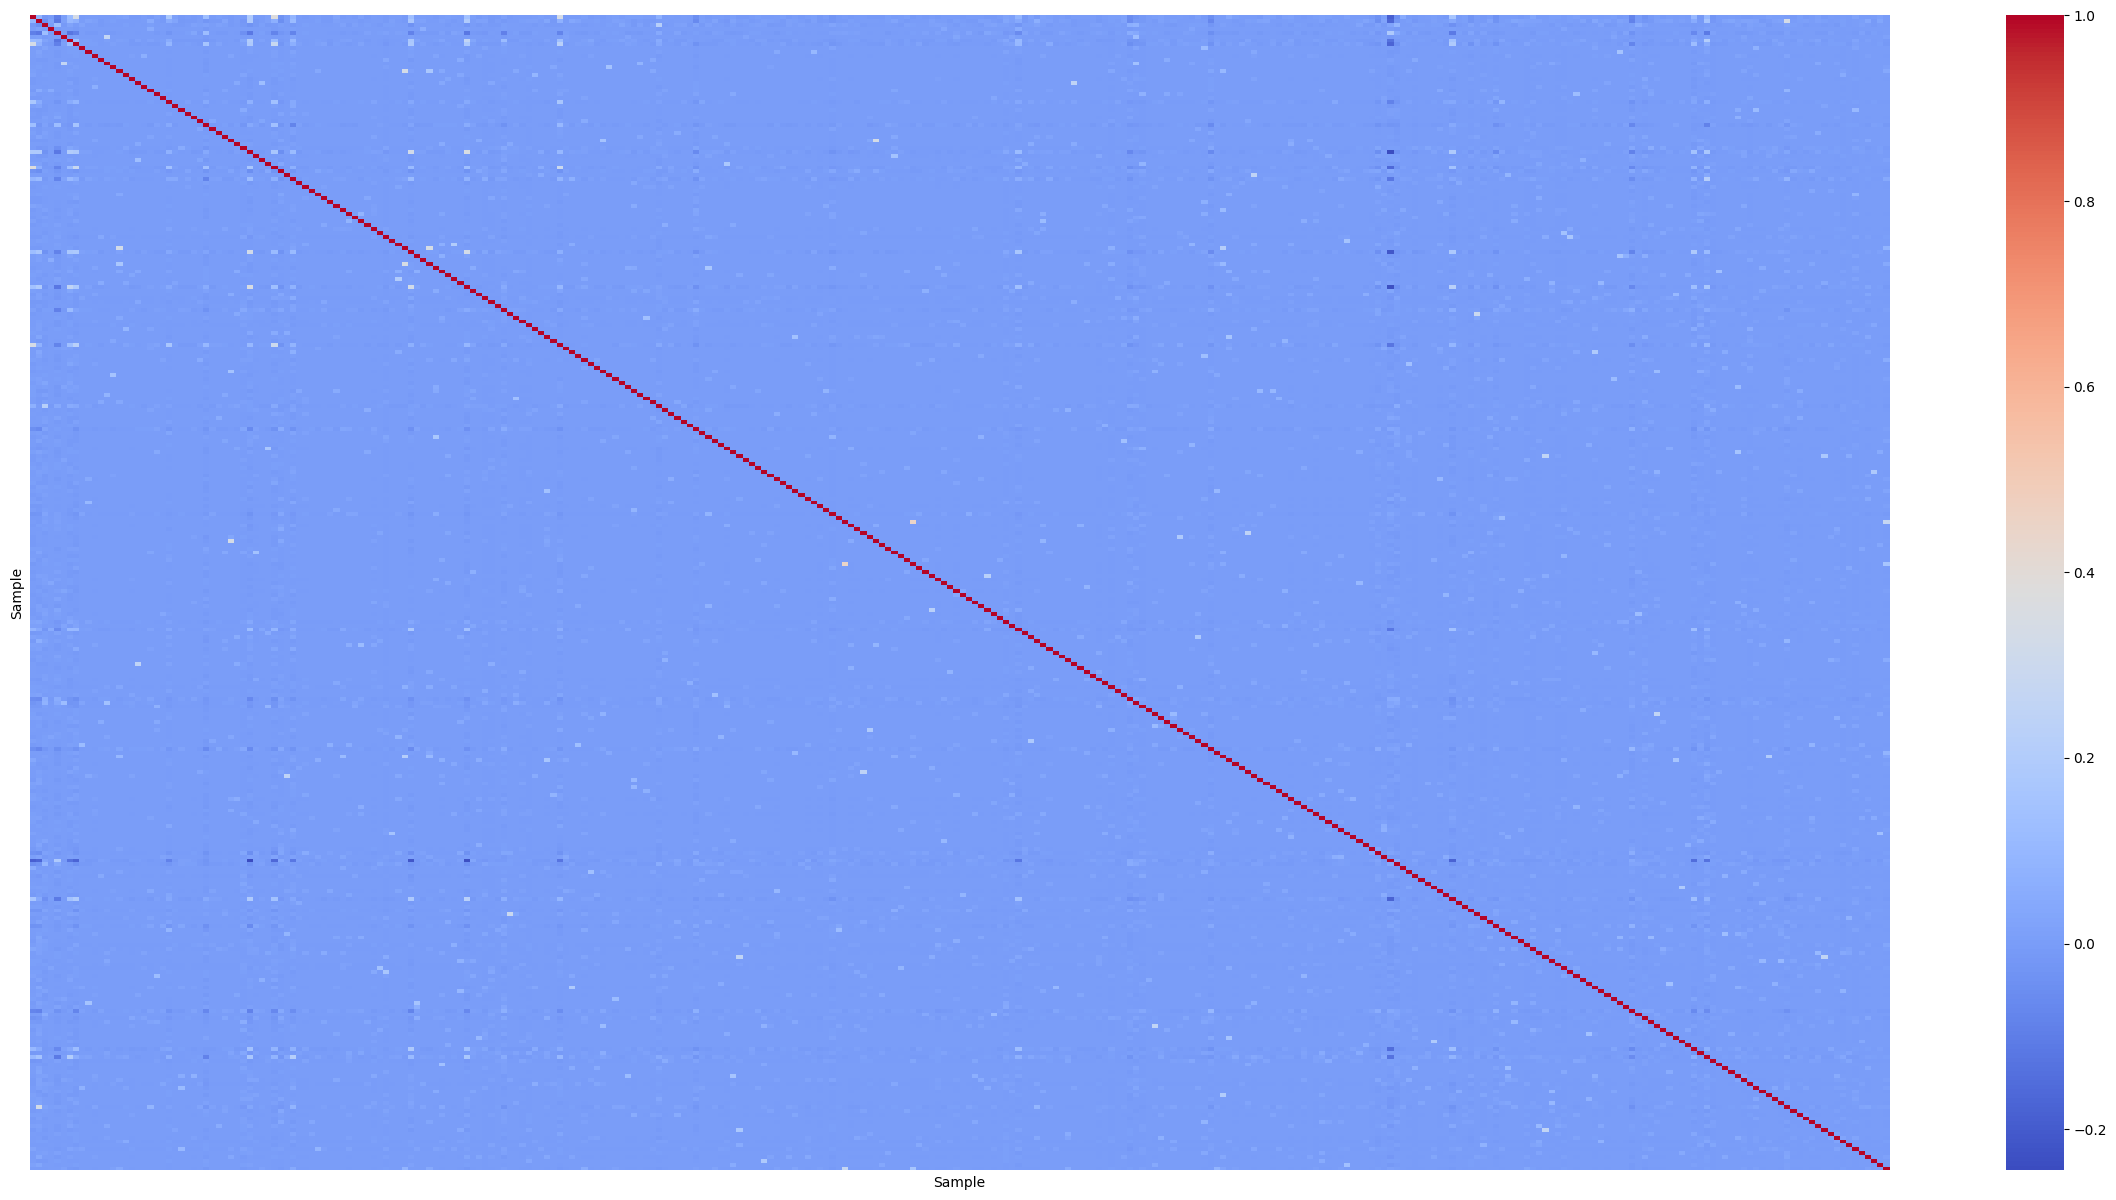

In [ ]:
#pearson correlation coefficient
corr_matrix_p = h_train[:300].transpose().corr(method = 'pearson')

average = (corr_matrix_p.values.max() - corr_matrix_p.values.min()) /2 + corr_matrix_p.values.min()
print("Number of cells included: ", np.shape(corr_matrix_p))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_p.mean().mean())
print("Min. correlation of expression profiles between genes: ", corr_matrix_p.values.min())

plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix_p, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()

Number of cells included:  (300, 300)
Average between minimum and maximum correlation:  0.354595071567689
Average correlation of expression profiles between genes:  0.004336803996657323
Min. correlation of expression profiles between genes:  -0.290809856864622


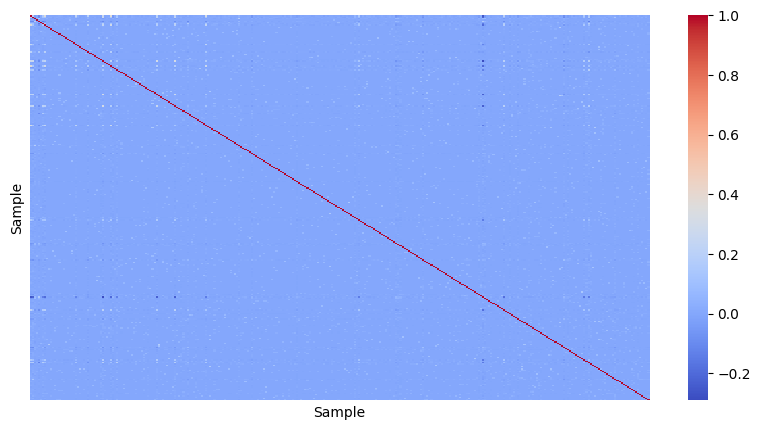

In [ ]:
#spearman correlation coefficient
corr_matrix_s = h_train[:300].transpose().corr(method = 'spearman')

average = (corr_matrix_s.values.max() - corr_matrix_s.values.min()) /2 + corr_matrix_s.values.min()
print("Number of cells included: ", np.shape(corr_matrix_s))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_s.mean().mean())
print("Min. correlation of expression profiles between genes: ", corr_matrix_s.values.min())

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_s, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()

Notice that for both correlation coefficients, most of the genes don't seem to be correlated.
Especially when looking at the Pearson correlation coefficient, there doesn't seem to be a structure overall.

# **QC and Dimensionality reduction**

In [ ]:
# Load the file
path_h_filtered_norm_train_drop = "./HCC1806_Filtered_Normalised_3000_Data_train.txt"
train = pd.read_csv(path_h_filtered_norm_train_drop, sep = " ")

## **QC for cells**

As before, we want first to clean the dataframe, due to the high number of cells. So:

In [ ]:
def show_indicators(df_given, counts_per_cell, counts_per_cell_threshold, number_of_genes, number_of_genes_threshold, mitochondrial_ratio, mitochondrial_threshold):
  #plotting
  fig, ax = plt.subplots(3, 1, figsize = (10, 15))

  ax[0].set_title("Number of counts per cell")
  ax[0].hist(counts_per_cell, bins = 60)
  ax[0].axvline(counts_per_cell_threshold, color = "r")
  ax[0].set_xlabel("Counts per cell")
  ax[0].set_ylabel("Number of cells")
  ax[0].grid(True)
  ax[1].set_title("Number of detected genes per cell")
  ax[1].hist(number_of_genes, bins = 60)
  ax[1].axvline(number_of_genes_threshold, color = "r")
  ax[1].set_xlabel("Number of genes")
  ax[1].set_ylabel("Number of cells")
  ax[1].grid(True)
  ax[2].set_title("Mitochondrial ratio per cell")
  ax[2].hist(mitochondrial_ratio, bins = 60)
  ax[2].axvline(mitochondrial_threshold, color = "r")
  ax[2].set_xlabel("Mitochondrial Ratio")
  ax[2].set_ylabel("Number of cells")
  ax[2].grid(True)

  plt.show()

In [ ]:
def removing_cells(df_given, counts_per_cell_threshold, number_of_genes_threshold, mitochondrial_threshold):
  """
  This function removes low-quality cells, based on three covariates:
  -Number of counts per cell
  -Number of detected genes per cell
  -Fraction of mitchondrial genes count per cell
  We are going to consider them together
  """

  # number of counts per cell
  counts_per_cell = df_given.sum(axis = 0) 
  #number of detected genes count
  number_of_genes = np.count_nonzero(df_given, axis=0) 
  #mitochondrial count
  mitochondrial_genes = df_given.index.str.startswith("MT-")
  mitochondrial_threshold = 0.05
  mitochondrial_ratio = df_given.loc[mitochondrial_genes, :].sum() / counts_per_cell
  
  show_indicators(df_given, counts_per_cell, counts_per_cell_threshold, number_of_genes, number_of_genes_threshold, mitochondrial_ratio, mitochondrial_threshold)

  df_modified = df_given.loc[:, (mitochondrial_ratio < mitochondrial_threshold) & (number_of_genes > number_of_genes_threshold) & (counts_per_cell > counts_per_cell_threshold)]
  return df_modified

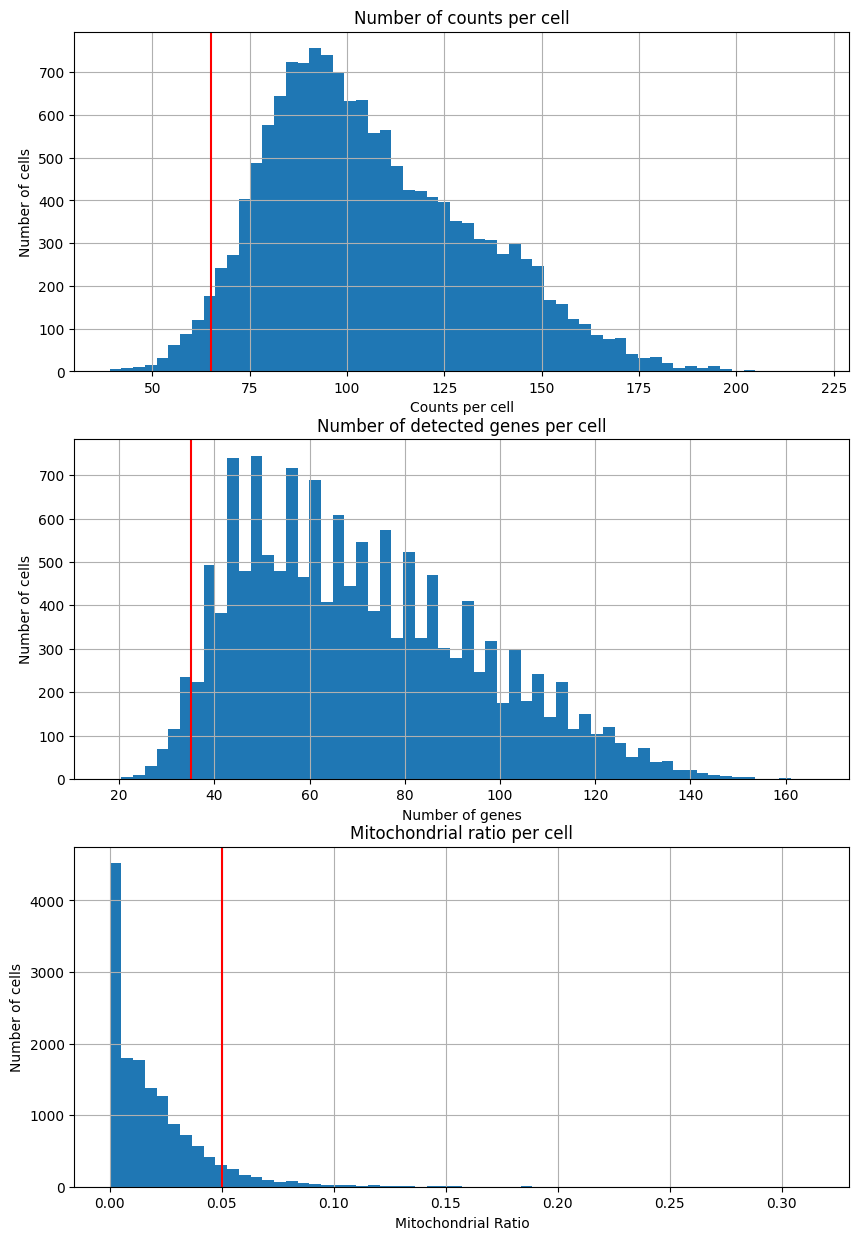

(3000, 12814)

In [ ]:
cpc_threshold = 65
no_genes_threshold = 35
mit_threshold = 0.05

reduced_train = removing_cells(train, cpc_threshold, no_genes_threshold, mit_threshold)
reduced_train.shape

Notice that there is a huge discrepancy between the threshold using in DropSeq and SmartSeq. However, this can be explained by the low efficiency of DropSeq. 

In [ ]:
#change the dataframe
train = reduced_train

## **PCA**

Now that we have the new reduced dataset, we can try and perform training. We will check how accuracy changes with different dimensions (using PCA)

In [ ]:
train = train.T

In [ ]:
train_label = np.array(train.index.map(lambda x: "Normoxia" if "Normoxia" in x else "Hypoxia"))
train_label.shape

(12814,)

In [ ]:
train.isna().sum().sum()

0

In [ ]:
missing = train.columns[train.isna().any()].tolist()
train.drop(missing, axis=1, inplace=True)

In [ ]:
train_scaled = pd.DataFrame(StandardScaler().fit_transform(train), columns=train.columns)

In [ ]:
complete_train = train.copy()
complete_train['Label'] = train_label
complete_train

H1-5  MALAT1  MT-RNR2  ARVCF  BCYRN1  ATXN7L2  IGFBP3  \
AAAAAACCCGGC_Normoxia     2       3        0      0       0        0       0   
AAAACCGGATGC_Normoxia     2       3        0      0       1        0       0   
AAAACGAGCTAG_Normoxia     5       2        0      0       1        0       1   
AAAAGCCTACCC_Normoxia     0      12        0      0       0        0       0   
AAACCAAGCCCA_Normoxia     0       1        0      0       1        0       0   
...                     ...     ...      ...    ...     ...      ...     ...   
TTTTTACCAATC_Hypoxia      0       0        0      0       0        0       0   
TTTTTCCGTGCA_Hypoxia      0       4        1      0       0        0       0   
TTTTTGCCTGGG_Hypoxia      0       1        0      0       1        0       0   
TTTTTGTAACAG_Hypoxia      3       3        1      0       0        0       1   
TTTTTTTGAATC_Hypoxia      1       6        0      0       0        0       1   

                       H1-3  CTIF  RNF123  ...  CDKN3  DLD  PMPCA  ZNF165  \
AAAAAACCCGGC_Normoxia     2     0       0  ...      0    0      0       0   
AAAACCGGATGC_Normoxia     0     0       0  ...      0    0      0       0   
AAAACGAGCTAG_Normoxia     3     0       0  ...      0    0      0       0   
AAAAGCCTACCC_Normoxia     0     0       0  ...      0    0      0       0   
AAACCAAGCCCA_Normoxia     0     0       0  ...      0    1      0       0   
...                     ...   ...     ...  ...    ...  ...    ...     ...   
TTTTTACCAATC_Hypoxia      0     0       0  ...      0    0      0       0   
TTTTTCCGTGCA_Hypoxia      0     0       0  ...      0    0      0       0   
TTTTTGCCTGGG_Hypoxia      0     0       0  ...      0    0      0       0   
TTTTTGTAACAG_Hypoxia      1     0       0  ...      0    0      0       0   
TTTTTTTGAATC_Hypoxia      0     0       0  ...      0    0      0       0   

                       SCCPDH  NTAN1  CLIP2  DUSP23  ZNF682     Label  
AAAAAACCCGGC_Normoxia       0      0      0       0       0  Normoxia  
AAAACCGGATGC_Normoxia       0      0      0       0       0  Normoxia  
AAAACGAGCTAG_Normoxia       0      0      0       0       0  Normoxia  
AAAAGCCTACCC_Normoxia       0      0      0       0       0  Normoxia  
AAACCAAGCCCA_Normoxia       0      0      0       0       0  Normoxia  
...                       ...    ...    ...     ...     ...       ...  
TTTTTACCAATC_Hypoxia        0      0      0       0       0   Hypoxia  
TTTTTCCGTGCA_Hypoxia        0      0      0       0       0   Hypoxia  
TTTTTGCCTGGG_Hypoxia        0      0      0       0       0   Hypoxia  
TTTTTGTAACAG_Hypoxia        0      0      0       0       0   Hypoxia  
TTTTTTTGAATC_Hypoxia        0      0      0       0       0   Hypoxia  

[12814 rows x 3001 columns]

In [ ]:
pca = PCA()

In [ ]:
colors1 = train.sum(axis=1)
cmap = {'Hypoxia': 'red', 'Normoxia': 'blue'}
colors2 = [cmap[cell_type] for cell_type in complete_train.Label]


def plot_dim_red(dim_type, df, ax1, ax2, ax3):
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17.5, 11))

  plt.suptitle(f"{dim_type} Visualization")

  # counts per cell - 2D
  sctr2d = axs[0, 0].scatter(df[:, 0], df[:, 1], c=colors1)
  axs[0, 0].set_xlabel(ax1)
  axs[0, 0].set_ylabel(ax2)
  axs[0, 0].grid(True)
  if dim_type == "PCA":
    axs[0, 0].set_title(f"Explained Variance:{round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1], 2)}")

  # counts per cell - 3D
  axs[0, 1].remove()
  axs[0, 1] = fig.add_subplot(222, projection='3d')
  sctr3d = axs[0, 1].scatter(df[:, 0], df[:, 1], df[:, 2], c=colors1)
  axs[0, 1].set_xlabel(ax1)
  axs[0, 1].set_ylabel(ax2)
  axs[0, 1].set_zlabel(ax3)
  if dim_type == "PCA":
    axs[0, 1].set_title(f"Explained Variance:{round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2], 2)}")
  fig.colorbar(sctr3d, ax=axs[0, 1], label="Counts per cell")

  # hypoxia normoxia - 2D
  sctr2d = axs[1, 0].scatter(df[:, 0], df[:, 1], c=colors2)
  axs[1, 0].set_xlabel(ax1)
  axs[1, 0].set_ylabel(ax2)
  axs[1, 0].grid(True)
  handles = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=val, label=key)[0] for key, val in cmap.items()]
  axs[1, 0].legend(handles=handles, numpoints=1, loc='lower right')

  # hypoxia normoxia - 3D
  axs[1, 1].remove()
  axs[1, 1] = fig.add_subplot(224, projection='3d')
  sctr3d = axs[1, 1].scatter(df[:, 0], df[:, 1], df[:, 2], c=colors2)
  axs[1, 1].set_xlabel(ax1)
  axs[1, 1].set_ylabel(ax2)
  axs[1, 1].set_zlabel(ax3)

  plt.tight_layout()

In [ ]:
train_pca = pca.fit_transform(train_scaled)

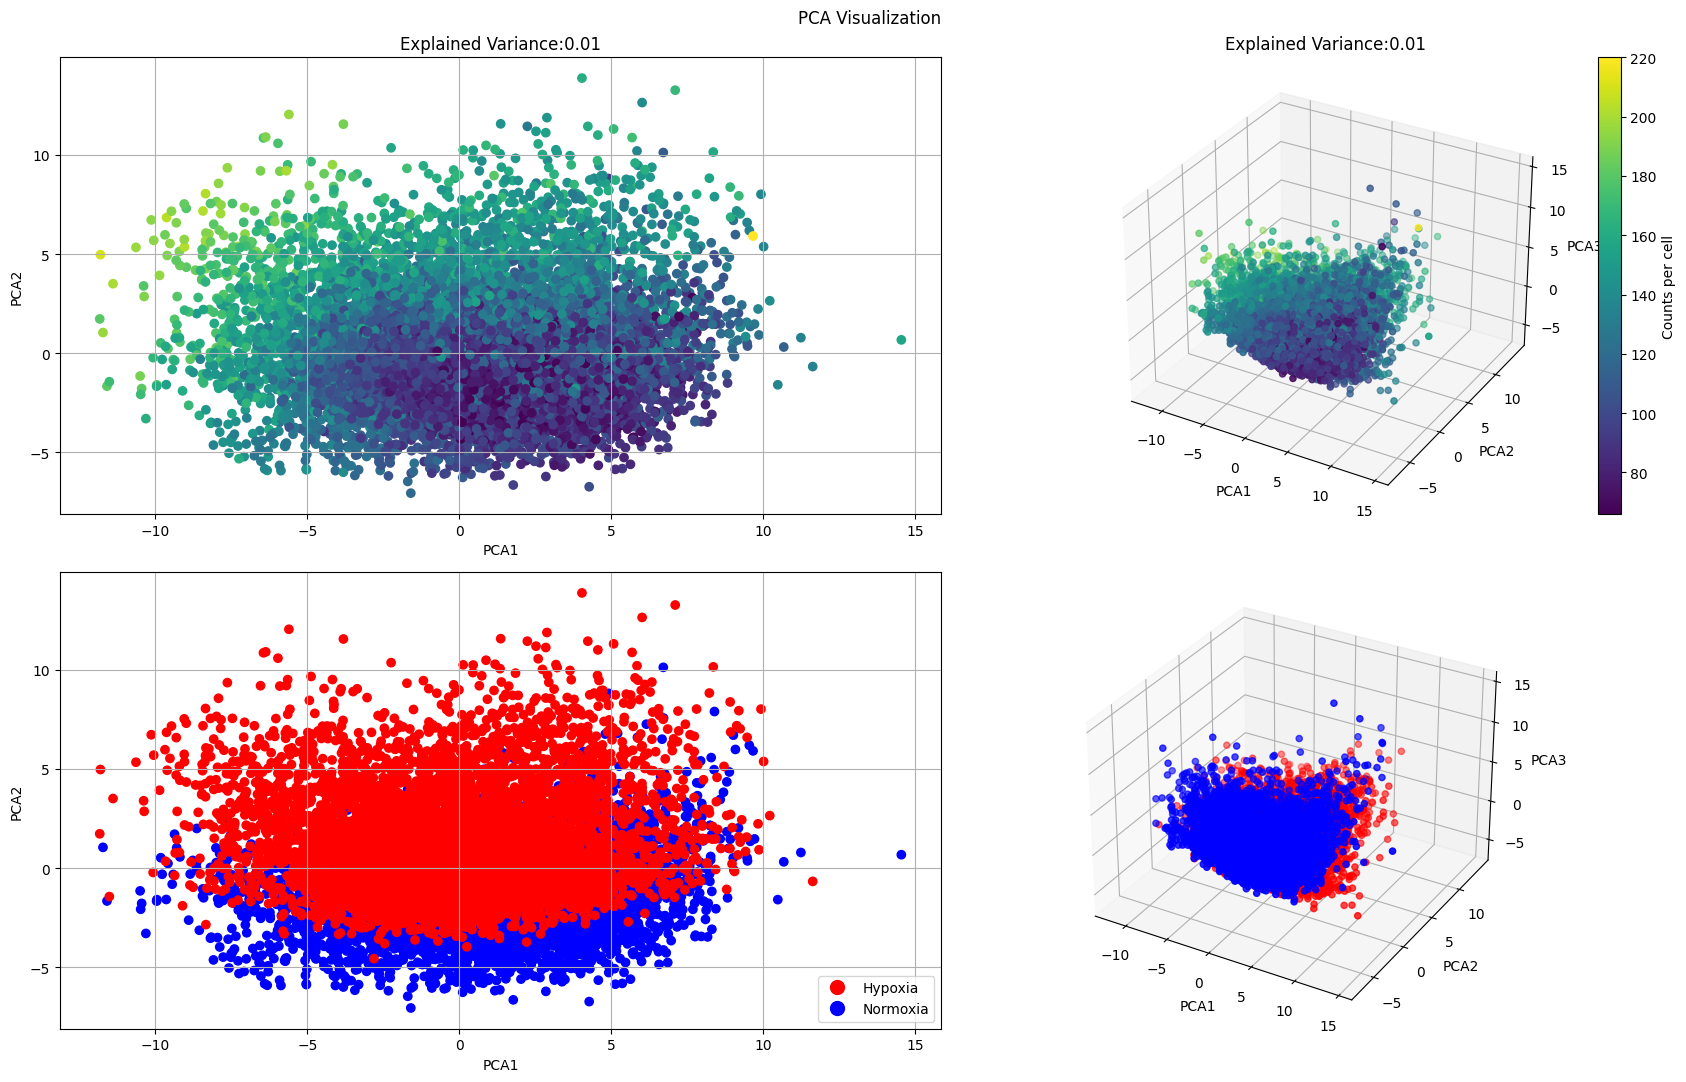

In [ ]:
plot_dim_red("PCA", train_pca, "PCA1", "PCA2", "PCA3")
plt.show()

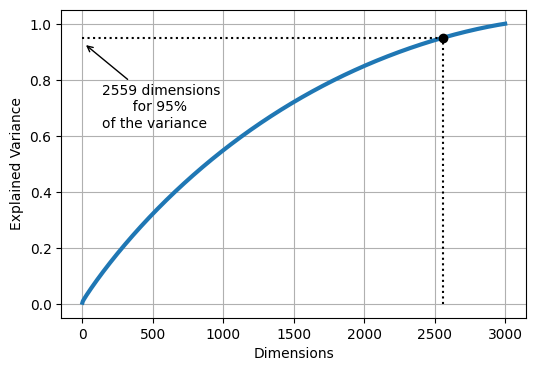

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
# plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(f"{d} dimensions\n       for 95%\nof the variance", xy=(10, 0.93), xytext=(140, 0.63),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

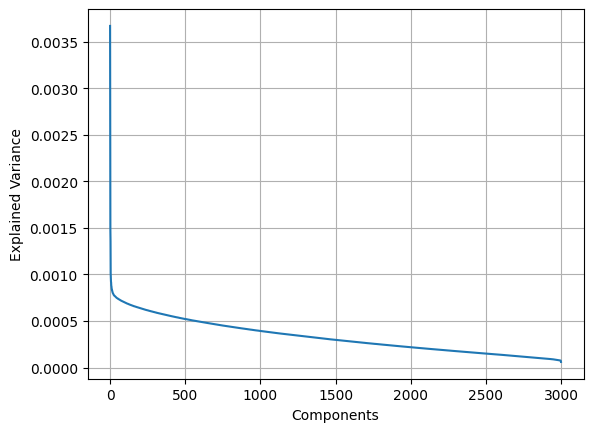

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Explained Variance")
plt.xlabel("Components")
plt.grid(True)
plt.show()

# **Unsupervised clustering**




We decided to run only k-means clustering on this dataframe as it is too big to visualize the results correctly.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

/Users/beatricecitterio/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beatricecitterio/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beatricecitterio/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beatricecitterio/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

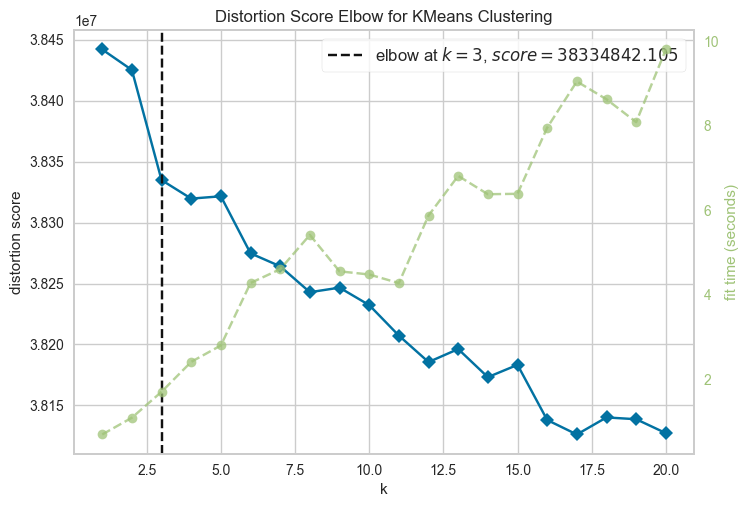

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,21), timings= True, random_state=42)
visualizer.fit(train_scaled)
visualizer.show()

/Users/beatricecitterio/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


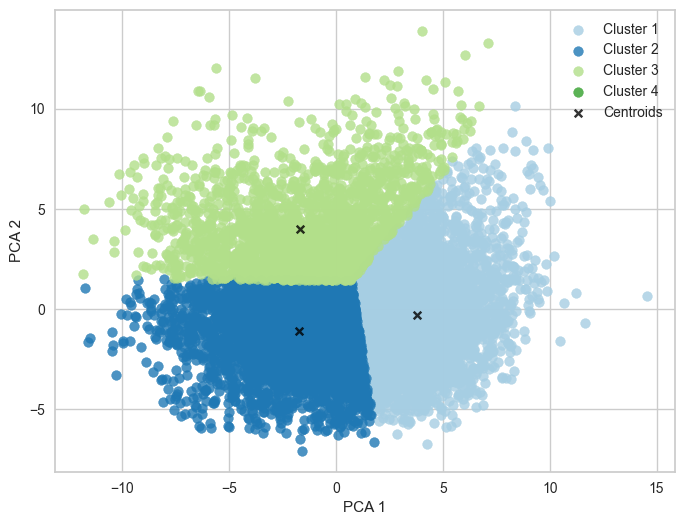

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

pca = PCA(n_components=2)
PCA_components = pca.fit_transform(train_scaled)

kmeans.fit(PCA_components)
cluster_labels = kmeans.predict(PCA_components)

centroids = kmeans.cluster_centers_
train_scaled['cluster'] = cluster_labels
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Paired", n_colors=4)

for i in range(4):
    ax.scatter(PCA_components[train_scaled['cluster']==i, 0], PCA_components[train_scaled['cluster']==i, 1], alpha=0.8, label='Cluster '+str(i+1), color=colors[i])

ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=30, color='black', alpha = 0.8, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
ax.legend()
plt.show()


/Users/beatricecitterio/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


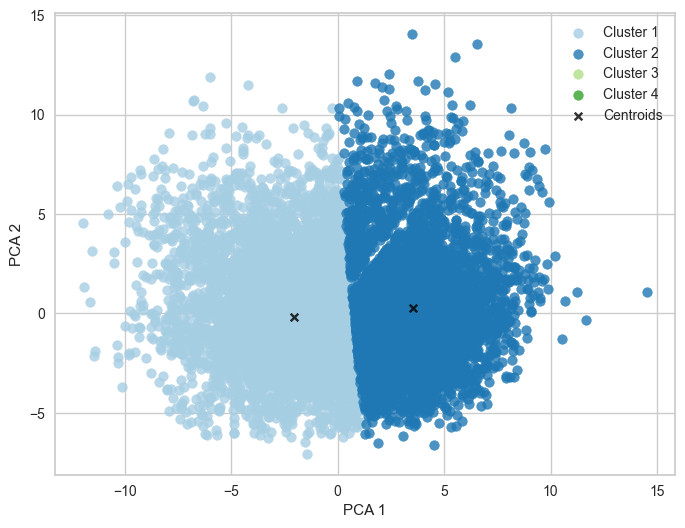

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)

pca = PCA(n_components=2)
PCA_components = pca.fit_transform(train_scaled)
kmeans.fit(PCA_components)

cluster_labels = kmeans.predict(PCA_components)

centroids = kmeans.cluster_centers_
train_scaled['cluster'] = cluster_labels

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("Paired", n_colors=4)

for i in range(4):
    ax.scatter(PCA_components[train_scaled['cluster']==i, 0], PCA_components[train_scaled['cluster']==i, 1], alpha=0.8, label='Cluster '+str(i+1), color=colors[i])

ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=30, color='black', alpha = 0.8, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
ax.legend()
plt.show()


# **Supervised training**

In [ ]:
model_pipeline = []
model_pipeline.append(DummyClassifier())
model_pipeline.append(SGDClassifier(loss ="log_loss", penalty="l2", alpha=1000,
                                     random_state=123, learning_rate="adaptive", eta0=1))
model_pipeline.append(LogisticRegression(penalty="l1", C=0.01, solver="liblinear"))
model_pipeline.append(RandomForestClassifier(random_state=42))

Our first idea was to try on this dataset the same models we ran on SmartSeq dataframes, i.e. "Dummy", "SDG", "Logistic", "Random Forest", "SVM", "Linear SVM", "KNN", "Gaussian NB". However, due to the large dimensions of this data, we figured that we don't have enough computational power to do so. So, we decided to first try to apply only a few methods, namely "Dummy", "SDG", "Logistic" and "Random Forest", on the dataframe, then to apply all the methods mentioned above on a reduced version of our dataframe, after running PCA with only 250 dimensions.


In [ ]:
model_index = ["Dummy", "SDG", "Logistic", "Random Forest"]

In [ ]:
acc_list = []
cm_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []

auc_list = []
imp_list = []


for model in model_pipeline:

  scores, auc_val = 0, 0

  model.fit(train, train_label)
  acc_list.append(cross_val_score(model, train, train_label, scoring="accuracy", cv=10).mean().round(3))

  label_pred = cross_val_predict(model, train, train_label, cv=10)
  cm_list.append(confusion_matrix(train_label, label_pred))

  prec_list_n.append(precision_score(train_label, label_pred, pos_label="Normoxia").round(3))
  rec_list_n.append(recall_score(train_label, label_pred, pos_label="Normoxia").round(3))
  f1_list_n.append(f1_score(train_label, label_pred, pos_label="Normoxia").round(3))

  if isinstance(model, DummyClassifier):
    auc_val = None
    coef = None
  elif isinstance(model, (RandomForestClassifier, KNeighborsClassifier, GaussianNB)):
    scores = cross_val_predict(model, train, train_label, cv=10, method="predict_proba")[:, 1]
    auc_val = roc_auc_score(train_label, scores).round(3)

    if isinstance(model, RandomForestClassifier):
      coef = np.array(model.feature_importances_).ravel()
    else:
      coef = None

  else:
    scores = cross_val_predict(model, train, train_label, cv=10, method='decision_function')
    auc_val = roc_auc_score(train_label, scores).round(3)
    coef = np.array(model.coef_).ravel()

  auc_list.append(auc_val)

  importance = {}
  features = np.array(train.columns)
  if coef is not None:
    for i, c in enumerate(coef):
      importance[features[i]] = c

    largest_items = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:30]
    largest_keys = [item[0] for item in largest_items]
    largest_values = [item[1] for item in largest_items]

    largest = {largest_keys[i]:largest_values[i] for i in range(len(largest_keys))}
    largest = {k:v for k, v in largest.items() if v != 0}

    imp_list.append(largest)
  else:
    imp_list.append(None)


  print(f"{model} evaluation completed!")

print("\nAll models have been evaluated!")



/Users/beatricecitterio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DummyClassifier() evaluation completed!


/Users/beatricecitterio/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SGDClassifier(alpha=1000, eta0=1, learning_rate='adaptive', loss='log_loss',
              random_state=123) evaluation completed!
LogisticRegression(C=0.01, penalty='l1', solver='liblinear') evaluation completed!
RandomForestClassifier(random_state=42) evaluation completed!

All models have been evaluated!


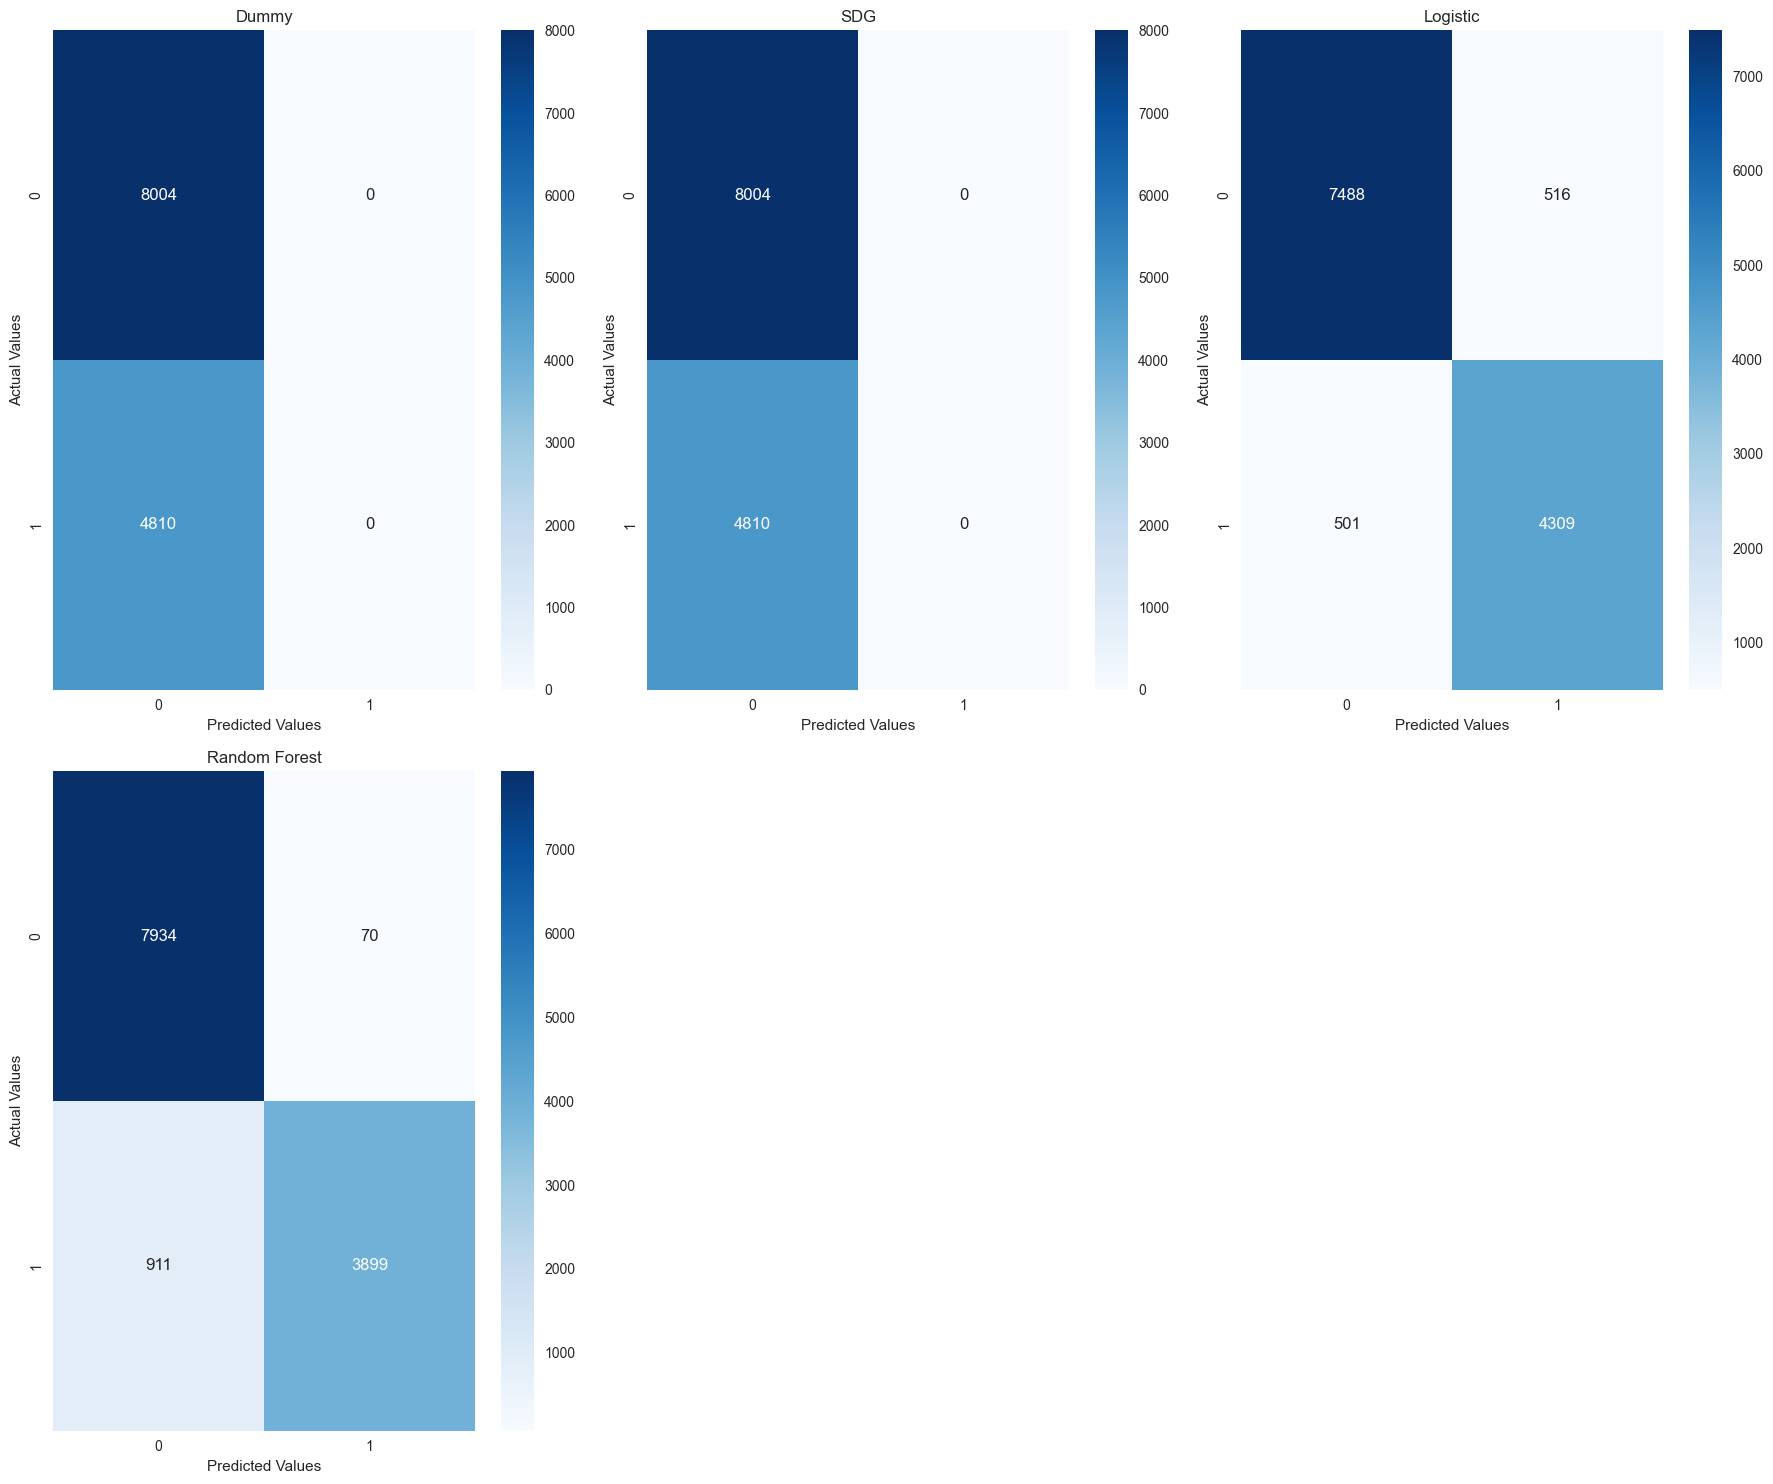

In [ ]:
fig = plt.figure(figsize=(18, 15))

num_plots = len(cm_list)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

for i in range(num_plots):
    cm, model = cm_list[i], model_index[i]
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    ax.set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', ax=ax)
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame({"Model":model_index, "Accuracy": acc_list, "Precision (Normoxia)": prec_list_n,
                           "Recall (Normoxia)": rec_list_n, "F1 (Normoxia)": f1_list_n, "Auc": auc_list})
results_df

Model  Accuracy  Precision (Normoxia)  Recall (Normoxia)  \
0          Dummy     0.625                 0.000              0.000   
1            SDG     0.625                 0.000              0.000   
2       Logistic     0.921                 0.893              0.896   
3  Random Forest     0.923                 0.982              0.811   

   F1 (Normoxia)    Auc  
0          0.000    NaN  
1          0.000  0.844  
2          0.894  0.976  
3          0.888  0.988

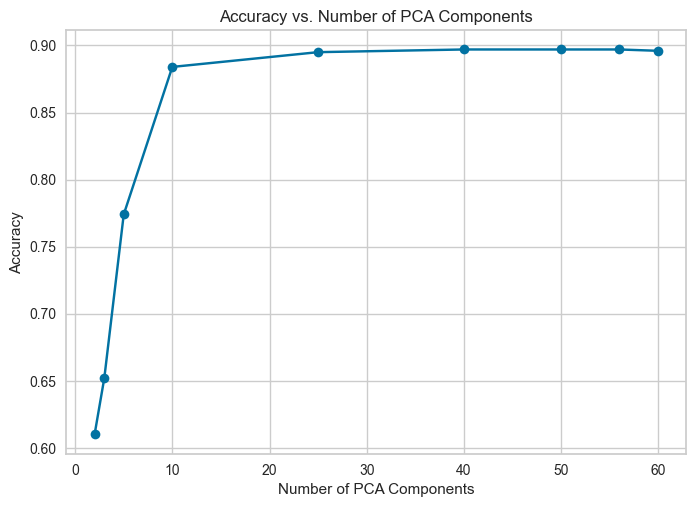

In [ ]:
n_components = [2, 3, 5, 10, 25, 40, 50, 56, 60]
accuracies = []

for n in n_components:
    pca = PCA(n_components=n)
    train_transformed = pca.fit_transform(train)

    rf = RandomForestClassifier(random_state=42)
    rf.fit(train_transformed, train_label)

    accuracies.append(cross_val_score(rf, train_transformed, train_label, scoring="accuracy", cv=10).mean().round(3))

plt.plot(n_components, accuracies, 'o-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy (Random Forest) vs. Number of PCA Components')
plt.show()


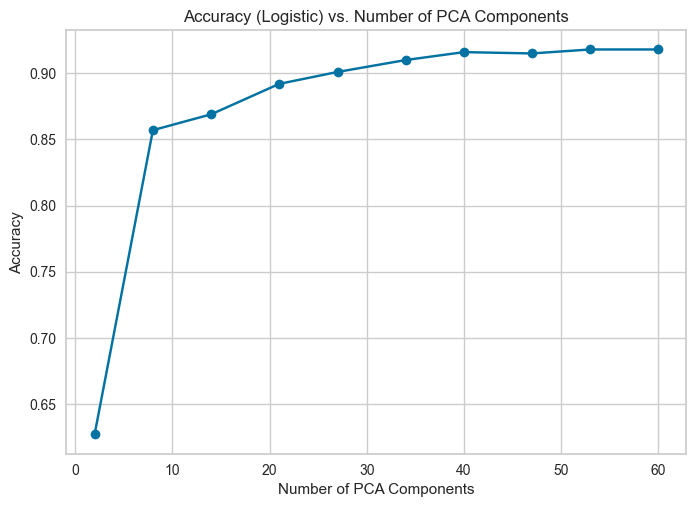

In [ ]:
n_components = np.linspace(2, 60, 10).astype(int)
accuracies_logi = []
for n in n_components:
    pca = PCA(n_components=n)
    train_transformed = pca.fit_transform(train)
                                          
    logi = LogisticRegression(penalty="l1", C=0.01, solver='liblinear')
    logi.fit(train_transformed, train_label)

    accuracies_logi.append(cross_val_score(logi, train_transformed, train_label, scoring="accuracy", cv=10).mean().round(3))

plt.plot(n_components, accuracies_logi, 'o-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy (Logistic) vs. Number of PCA Components')
plt.show()

In [ ]:
np.argmax(accuracies_logi)

8

In [ ]:
n_components[5]

34

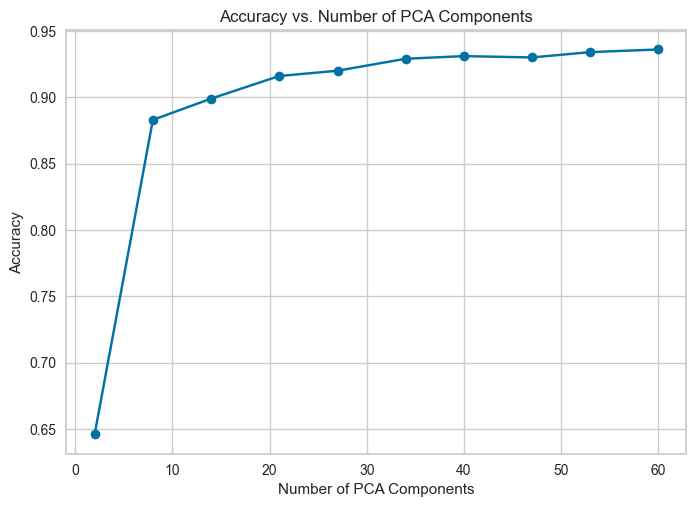

In [ ]:
n_components = np.linspace(2, 60, 10).astype(int)
accuracies_svm = []

for n in n_components:
    pca = PCA(n_components=n)
    train_transformed = pca.fit_transform(train)

    svm = SVC()
    svm.fit(train_transformed, train_label)

    accuracies_svm.append(cross_val_score(svm, train_transformed, train_label, scoring="accuracy", cv=10).mean().round(3))

plt.plot(n_components, accuracies_svm, 'o-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy (SVM) vs. Number of PCA Components')
plt.show()

In [ ]:
np.argmax(accuracies_svm)

9

In [ ]:
n_components[6]

40

## **Supervised Training on 250 Dimensions**

In [ ]:
model_pipeline = []
model_pipeline.append(DummyClassifier())
model_pipeline.append(SGDClassifier(loss ="log_loss", penalty="l2", alpha=1000,
                                     random_state=123, learning_rate="adaptive", eta0=1))
model_pipeline.append(LogisticRegression(penalty="l1", C=0.01, solver="liblinear"))
model_pipeline.append(RandomForestClassifier(random_state=42))
model_pipeline.append(SVC(kernel='linear'))
model_pipeline.append(LinearSVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())

In [ ]:
model_index = ["Dummy", "SDG", "Logistic", "Random Forest", "SVM", "Linear SVM", "KNN", "Gaussian NB"]

In [ ]:
train_label_pca = np.array(train.index.map(lambda x: "Normoxia" if "Normoxia" in x else "Hypoxia"))

In [ ]:
pca = PCA(n_components=250)
train_pca = pd.DataFrame(pca.fit_transform(train), index=train.index)

In [ ]:
acc_list = []
cm_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []

auc_list = []
imp_list = []


for model in model_pipeline:

  scores, auc_val = 0, 0

  model.fit(train_pca, train_label_pca)
  acc_list.append(cross_val_score(model, train_pca, train_label_pca, scoring="accuracy", cv=10).mean().round(3))

  label_pred = cross_val_predict(model, train_pca, train_label_pca, cv=10)
  cm_list.append(confusion_matrix(train_label_pca, label_pred))

  prec_list_n.append(precision_score(train_label_pca, label_pred, pos_label="Normoxia").round(3))
  rec_list_n.append(recall_score(train_label_pca, label_pred, pos_label="Normoxia").round(3))
  f1_list_n.append(f1_score(train_label_pca, label_pred, pos_label="Normoxia").round(3))

  if isinstance(model, DummyClassifier):
    auc_val = None
    coef = None
  elif isinstance(model, (RandomForestClassifier, KNeighborsClassifier, GaussianNB)):
    scores = cross_val_predict(model, train_pca, train_label_pca, cv=10, method="predict_proba")[:, 1]
    auc_val = roc_auc_score(train_label_pca, scores).round(3)

    if isinstance(model, RandomForestClassifier):
      coef = np.array(model.feature_importances_).ravel()
    else:
      coef = None

  else:
    scores = cross_val_predict(model, train_pca, train_label_pca, cv=10, method='decision_function')
    auc_val = roc_auc_score(train_label_pca, scores).round(3)
    coef = np.array(model.coef_).ravel()

  auc_list.append(auc_val)

  importance = {}
  features = np.array(train_pca.columns)
  if coef is not None:
    for i, c in enumerate(coef):
      importance[features[i]] = c

    largest_items = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:30]
    largest_keys = [item[0] for item in largest_items]
    largest_values = [item[1] for item in largest_items]

    largest = {largest_keys[i]:largest_values[i] for i in range(len(largest_keys))}
    largest = {k:v for k, v in largest.items() if v != 0}

    imp_list.append(largest)
  else:
    imp_list.append(None)


  print(f"{model} evaluation completed!")

print("\nAll models have been evaluated!")


Now all models have been evaluated.

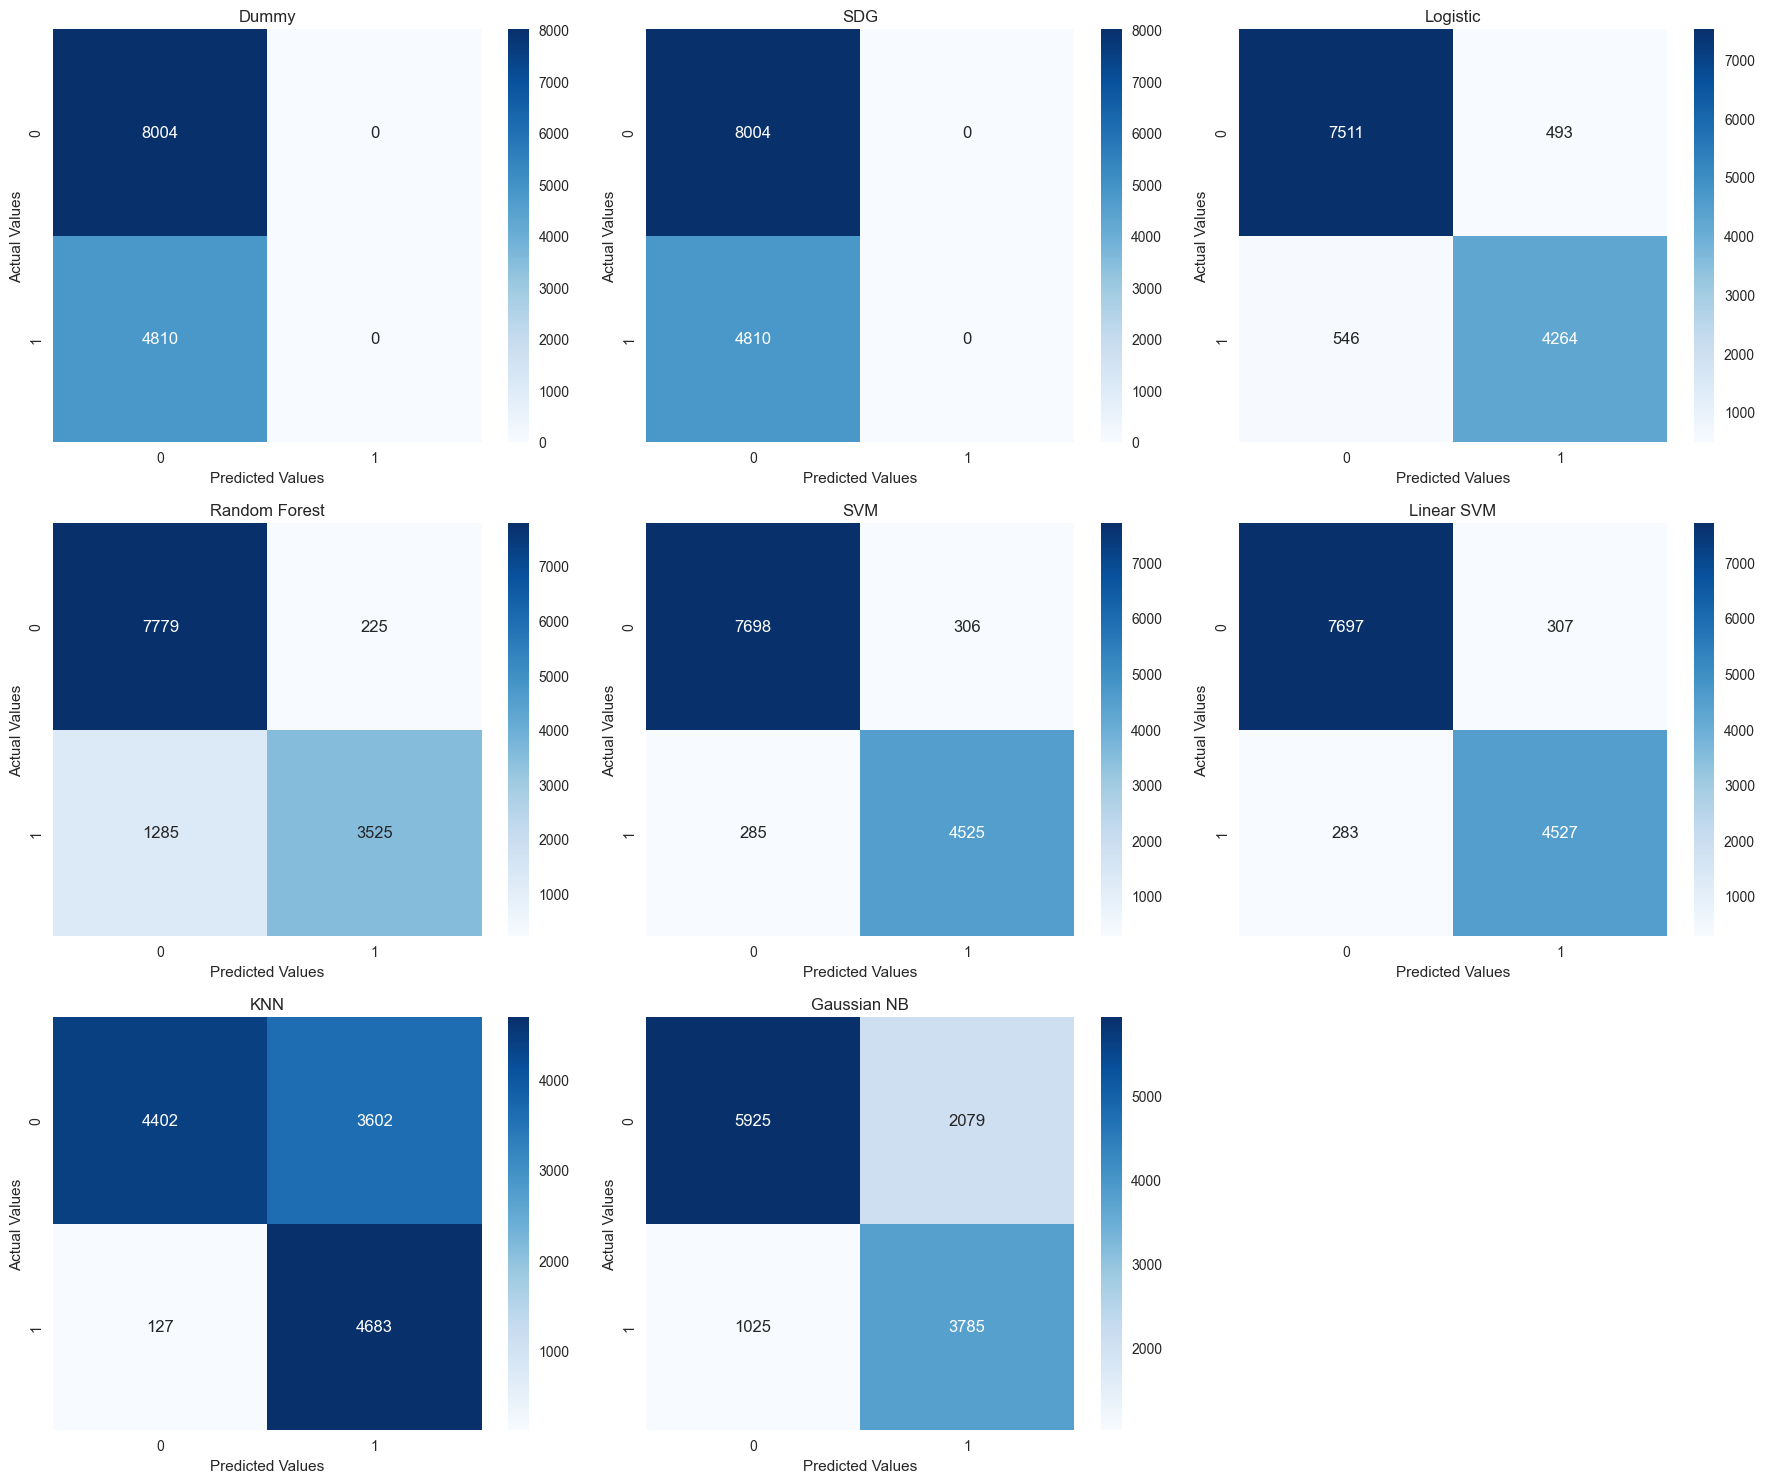

In [ ]:
fig = plt.figure(figsize=(18, 15))

num_plots = len(cm_list)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

for i in range(num_plots):
    cm, model = cm_list[i], model_index[i]
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    ax.set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', ax=ax)
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame({"Model":model_index, "Accuracy": acc_list, "Precision (Normoxia)": prec_list_n,
                           "Recall (Normoxia)": rec_list_n, "F1 (Normoxia)": f1_list_n, "Auc": auc_list})
results_df

Model  Accuracy  Precision (Normoxia)  Recall (Normoxia)  \
0          Dummy     0.625                 0.000              0.000   
1            SDG     0.625                 0.000              0.000   
2       Logistic     0.919                 0.896              0.886   
3  Random Forest     0.882                 0.940              0.733   
4            SVM     0.954                 0.937              0.941   
5     Linear SVM     0.954                 0.936              0.941   
6            KNN     0.709                 0.565              0.974   
7    Gaussian NB     0.758                 0.645              0.787   

   F1 (Normoxia)    Auc  
0          0.000    NaN  
1          0.000  0.887  
2          0.891  0.973  
3          0.824  0.963  
4          0.939  0.990  
5          0.939  0.990  
6          0.715  0.900  
7          0.709  0.849

From this, we can conclude that SVM and Linear SVM are the methods that give us best performances. Moreover, comparing the results obtained for the first four models, we see that they are relatively similar to those obtained by running these models on the whole dataframe: thus, to have higher efficiency, it makes sense to consider this reduced dataset to train our model, as this won't give us a large loss in accuracy. <br>
Finally, these results also show us that the performances of our classification are overall better for SmartSeq cells rather than DropSeq ones.

## **Hyperparameter tuning**

We attempted to do hyperparameter tuning, but the dataframe is too heavy and thus it made it impossible to run it.

# **Test**

In [ ]:
path_h_filtered_norm_test = "./HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt"
test = pd.read_csv(path_h_filtered_norm_test, sep = " ").transpose()

Now we fit the train data on the model that had the best performance: SVM. In this case, we didn't perform hyperparameter selection on the model.

In [ ]:
svm = SVC(kernel='linear')

In [ ]:
svm.fit(train, train_label)
pred_svm = svm.predict(test)

In [ ]:
test_results = pd.DataFrame(pred_svm, columns = ['Predicted Labels'])

In [ ]:
test_results.to_excel('HCC1806_DropSeq_test_results.xlsx')